# Graded Challenge 4

## Introduction

Nama    : Fitri Octaviani

Batch   : HCK 006

## Objective

Membuat model clustering untuk melakukan customer segmentation dari data penggunaan kartu kredit selama 6 bulan terakhir.

## About the Data

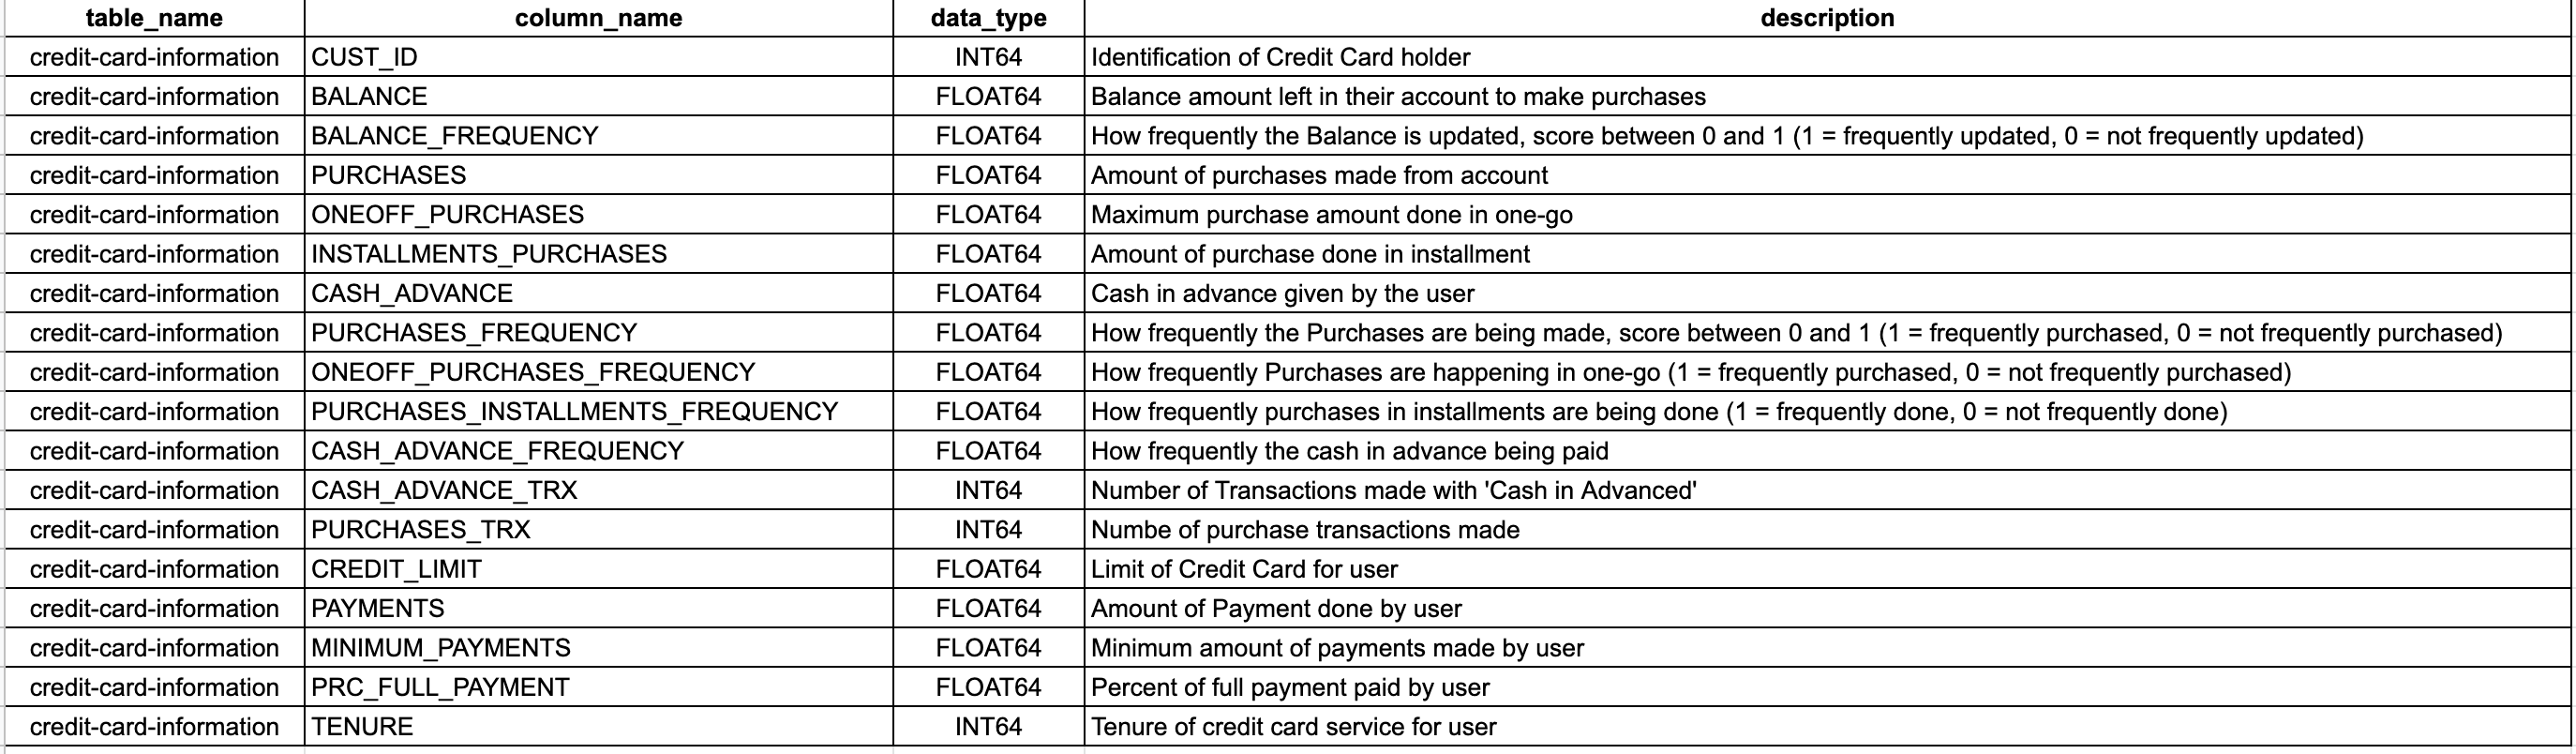

## SQL Query



```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_006_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```

# Import Library

In [1]:
!pip install feature_engine

In [2]:
!pip install kneed

In [3]:
# Data Loading
import pandas as pd

# Exploratory Data Analysis
import numpy as np
import seaborn as sns

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer

# Model Definition
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Model Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
import joblib

# Data Loading

In [4]:
df = pd.read_csv ('/content/sample_data/h8dsft_P1G4_Fitri Octaviani.csv')

In [5]:
# menampilkan data teratas
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [6]:
# menampilkan data terbawah
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [7]:
df.shape

(4475, 18)

Pada dataset ini terdiri dari 4475 columns dan 18 row.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [9]:
# menampilkan missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom Minimum_payments dan credit_limit

In [10]:
# percentase missing value
df.MINIMUM_PAYMENTS.isna().sum()/df.CUST_ID.count()

0.0353072625698324

Missing value pada kolom minimum_payments adalah 3.53%, sehingga entri tersebut akan di drop karena < 5%

In [11]:
# drop missing value
df.dropna(inplace=True)

In [12]:
# melihat missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Dalam dataset tersebut sudah tidak memiliki missing value.

In [13]:
# cek duplikat data
df.duplicated().sum()

0

Dataset tidak memiliki data duplikat

In [14]:
# melihat list kolom yang memiliki nilai sebagai kategori
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

[]

In [15]:
# melihat list kolom yang memiliki nilai sebagai numerikal
num_cols = df.describe().columns.tolist()
num_cols

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

Semua row dataset bernilai numerical.

In [16]:
# numerical overview
for i in num_cols:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  CUST_ID
Total unique labels:  4316
------------------------------
Column:  BALANCE
Total unique labels:  4313
------------------------------
Column:  BALANCE_FREQUENCY
Total unique labels:  38
------------------------------
Column:  PURCHASES
Total unique labels:  3118
------------------------------
Column:  ONEOFF_PURCHASES
Total unique labels:  2022
------------------------------
Column:  INSTALLMENTS_PURCHASES
Total unique labels:  2292
------------------------------
Column:  CASH_ADVANCE
Total unique labels:  2091
------------------------------
Column:  PURCHASES_FREQUENCY
Total unique labels:  47
------------------------------
Column:  ONEOFF_PURCHASES_FREQUENCY
Total unique labels:  44
------------------------------
Column:  PURCHASES_INSTALLMENTS_FREQUENCY
Total unique labels:  47
------------------------------
Column:  CASH_ADVANCE_FREQUENCY
Total unique labels:  46
------------------------------
Column:  CASH_ADVANCE_TRX
Total unique labels:  55
----------------------

In [17]:
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4316.000000   4316.000000        4316.000000   4316.000000   
mean   4474.638554   1600.114511           0.895236   1025.274057   
std    2589.259871   2107.347942           0.206730   2241.729131   
min       2.000000      0.000000           0.000000      0.000000   
25%    2241.500000    152.877191           0.909091     44.662500   
50%    4475.000000    916.693628           1.000000    379.300000   
75%    6712.500000   2112.447004           1.000000   1149.940000   
max    8950.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4316.000000             4316.000000   4316.000000   
mean         600.770438              424.888909    986.980658   
std         1690.105736              940.627467   2159.134558   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           35.955000               95.845000      0.000000   
75%          600.000000              498.592500   1110.248526   
max        40761.250000            22500.000000  29282.109150   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4316.000000                 4316.000000   
mean              0.495675                    0.205447   
std               0.399564                    0.299252   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4316.000000             4316.000000   
mean                           0.369805                0.136236   
std                            0.398217                0.200511   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.181818                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.166667   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4316.000000    4316.000000   4316.000000   4316.000000   
mean           3.252549      14.801900   4524.431479   1785.801612   
std            6.576772      24.473182   3688.856008   2997.093142   
min            0.000000       0.000000    150.000000      4.841543   
25%            0.000000       1.000000   1500.000000    427.905948   
50%            0.000000       7.000000   3000.000000    874.442322   
75%            4.000000      17.000000   6500.000000   1954.888216   
max          110.000000     358.000000  30000.000000  46930.598240   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4316.000000       4316.000000  4316.000000  
mean         854.624165          0.162997    11.531511  
std         2306.642962          0.299700     1.324580  
min            0.037744          0.000000     6.000000  
25%          169.878606          0.000000    12.000000  
50%          309.983200          0.000000    12.000000  
75%          830.656813          0.166667    12.000000  
max        61031.618600          1.000000    12.000000

- Balance merupakan saldo jumlah yang tersisa di akun mereka, yang mana rata-rata (4475 user) memiliki saldo 4316 dengan saldo tertinggi 19043 dan saldo terendah $0
- Balance frequency merupakan seberapa sering user melakukan topup, rata-rata tersebut mecapai 0.895, untuk range ini kita anggap untuk topup sangat sering

# Exploratory Data Analysis

In [18]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     1902   943.584041              0.875      103.0             103.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   
5     4266  2237.238086              1.000      120.0             120.0   
7     4680   424.994385              0.375     1200.0            1200.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   
5                       0.125                               0.0   
7                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                     0.0                 0              1        1000.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
7                     0.0                 0              1        1200.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1  215.325023        410.484825               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
7   57.266292         56.720210               0.0       8

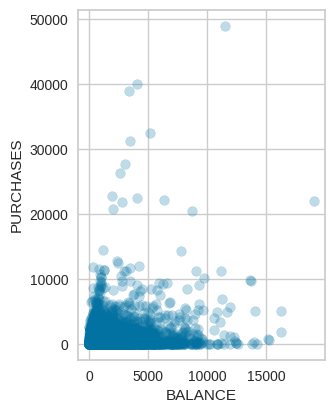

In [19]:
plt.figure(figsize=(7,10))
columns = ['PURCHASES']
n = 1
for x in columns:
    plt.subplot(2, 2, n)
    plt.scatter(df['BALANCE'], df[x], alpha=0.25)
    plt.xlabel('BALANCE')
    plt.ylabel(x)
    n=n+1

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

- Balance vs purchases : user yang memiliki saldo dibawah $10000 melakukan pembelian hampir sama dengan jumlah saldo yang mereka miliki

## Skewness

In [20]:
# check skewness
df.skew()

CUST_ID                             -0.000256
BALANCE                              2.440901
BALANCE_FREQUENCY                   -2.083168
PURCHASES                            8.902272
ONEOFF_PURCHASES                    10.045515
INSTALLMENTS_PURCHASES               8.030305
CASH_ADVANCE                         4.713175
PURCHASES_FREQUENCY                  0.035642
ONEOFF_PURCHASES_FREQUENCY           1.494505
PURCHASES_INSTALLMENTS_FREQUENCY     0.486577
CASH_ADVANCE_FREQUENCY               1.788835
CASH_ADVANCE_TRX                     4.722877
PURCHASES_TRX                        4.429897
CREDIT_LIMIT                         1.525379
PAYMENTS                             5.987445
MINIMUM_PAYMENTS                    12.356758
PRC_FULL_PAYMENT                     1.854400
TENURE                              -2.996978
dtype: float64

Dalam dataset tersebut mayoritas distribusi extreme skewed.

In [21]:
scaled_num_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS','TENURE']
titles = []
for i in range(len(scaled_num_col)):
    titles.append('Distribusi ' + scaled_num_col[i])

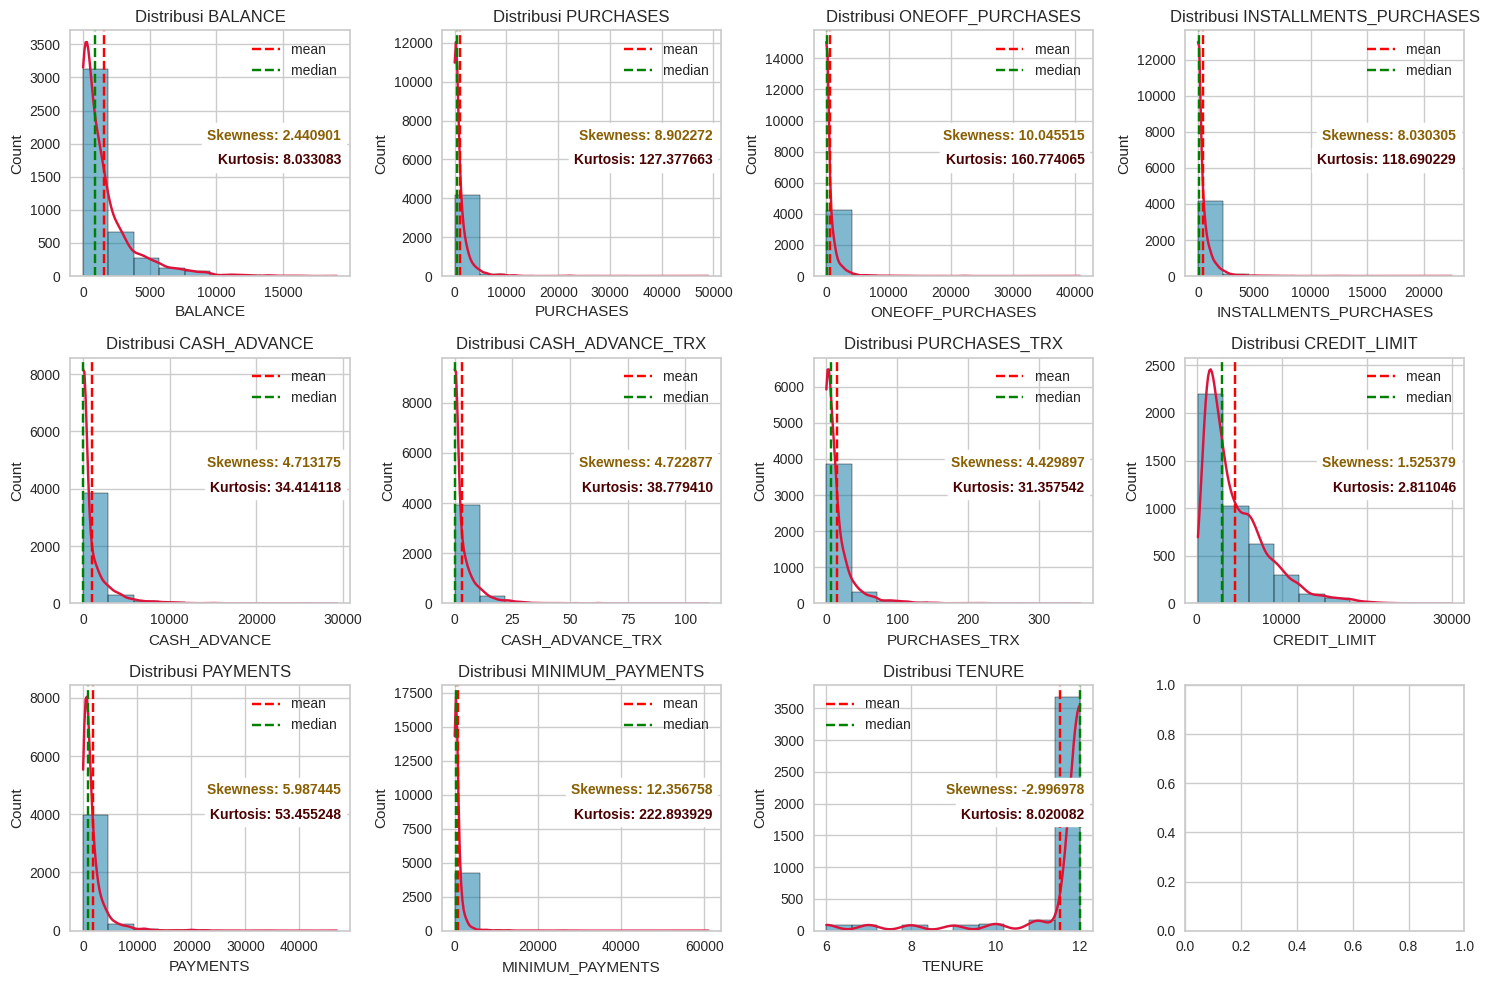

In [22]:
# plot distribusi kolom numerik
row_num=3
col_num=4
fig, axes= plt.subplots(row_num,col_num, figsize=(15,10))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)
x=0
try:
    for i in range(row_num):
        for j in range(col_num):
            sns.histplot(ax=axes[i][j], data=df[scaled_num_col[x]], kde=True, bins=10)
            axes[i][j].set_title(titles[x])
            axes[i][j].lines[0].set_color('crimson')
            axes[i][j].axvline(df[scaled_num_col[x]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
            axes[i][j].axvline(df[scaled_num_col[x]].median(), color = 'green', linestyle = 'dashed', label = 'median')
            axes[i][j].legend()
            axes[i][j].text(x=0.97, y=0.60, transform=axes[i][j].transAxes, s="Skewness: %f" % df[scaled_num_col[x]].skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:poo brown')
            axes[i][j].text(x=0.97, y=0.50, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[scaled_num_col[x]].kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:dried blood')
            x+=1
except:
    pass
plt.tight_layout()

Dalam 11 row tersebut tidak ada fitur terdistribusi normal, sehingga akan dilakukan log transform karena clustering k-means dan PCA data harus distribusi normal.

In [23]:
# copy ke df_train
df_train = df.copy()

In [24]:
# transform untuk mengubah ke distribusi normal
df_train.iloc[:,:] = np.log(1+df_train)

In [25]:
df_train

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     7.551187  6.850745           0.628609   4.644391          4.644391   
3     8.139441  6.136551           0.693147   6.373320          6.373320   
4     8.288283  6.960912           0.693147   7.280008          7.280008   
5     8.358666  7.713444           0.693147   4.795791          4.795791   
7     8.451267  6.054426           0.318454   7.090910          7.090910   
...        ...       ...                ...        ...               ...   
4470  8.440528  6.984724           0.693147   0.000000          0.000000   
4471  9.061260  6.697754           0.646627   0.000000          0.000000   
4472  8.365672  8.127845           0.693147   6.331466          6.059637   
4473  8.406708  8.484989           0.693147   7.375838          7.375838   
4474  8.178919  7.589845           0.693147   6.940261          5.428907   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                   0.000000      0.000000             0.117783   
3                   0.000000      0.000000             0.117783   
4                   0.000000      0.000000             0.117783   
5                   0.000000      0.000000             0.117783   
7                   0.000000      0.000000             0.117783   
...                      ...           ...                  ...   
4470                0.000000      7.139321             0.000000   
4471                0.000000      8.248182             0.000000   
4472                4.903495      7.605469             0.693147   
4473                0.000000      8.380302             0.374693   
4474                6.692257      8.374920             0.646627   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.117783                          0.000000   
3                       0.117783                          0.000000   
4                       0.117783                          0.000000   
5                       0.117783                          0.000000   
7                       0.117783                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.546544                          0.310155   
4473                    0.374693                          0.000000   
4474                    0.087011                          0.597837   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000          0.000000       0.693147      6.908755   
3                   0.000000          0.000000       0.693147      6.908755   
4                   0.000000          0.000000       0.693147      7.313887   
5                   0.000000          0.000000       0.693147      7.824446   
7                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
4470                0.435318          2.302585       0.000000      7.090910   
4471                0.435318          2.079442       0.000000      8.331105   
4472                0.435318          2.302585       3.044522      9.220390   
4473                0.435318          2.890372       3.258097      8.699681   
4474                0.435318          3.091042       2.890372      8.294300   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
1     5.376782          6.019772          0.000000  2.197225  
3     5.556954          5.028452          0.000000  2.197225  
4     5.986679          5.429973          0.000000  2.197225  
5     5.840941          6.570864          0.000000  2.197225  
7     4.065024          4.055607          0.000000  2.197225  
...        ...               ...               ...       ...  
4470  7.230299          5.607141          0.087011  2.4849

In [26]:
# melihat kembali hasil skew
df_train.skew()

CUST_ID                            -1.900085
BALANCE                            -0.777297
BALANCE_FREQUENCY                  -2.311370
PURCHASES                          -0.787030
ONEOFF_PURCHASES                    0.185882
INSTALLMENTS_PURCHASES             -0.048128
CASH_ADVANCE                        0.268025
PURCHASES_FREQUENCY                -0.119465
ONEOFF_PURCHASES_FREQUENCY          1.249621
PURCHASES_INSTALLMENTS_FREQUENCY    0.349248
CASH_ADVANCE_FREQUENCY              1.432956
CASH_ADVANCE_TRX                    0.919730
PURCHASES_TRX                      -0.001987
CREDIT_LIMIT                       -0.091366
PAYMENTS                            0.043348
MINIMUM_PAYMENTS                    0.283090
PRC_FULL_PAYMENT                    1.661233
TENURE                             -3.222589
dtype: float64

Dalam dataset tersebut, fitur sudah terdistribusi normal.

## Outlier

Handling outlier ini akan di lakukan dengan menggunakan capping/censoring.

In [27]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

   # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [28]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

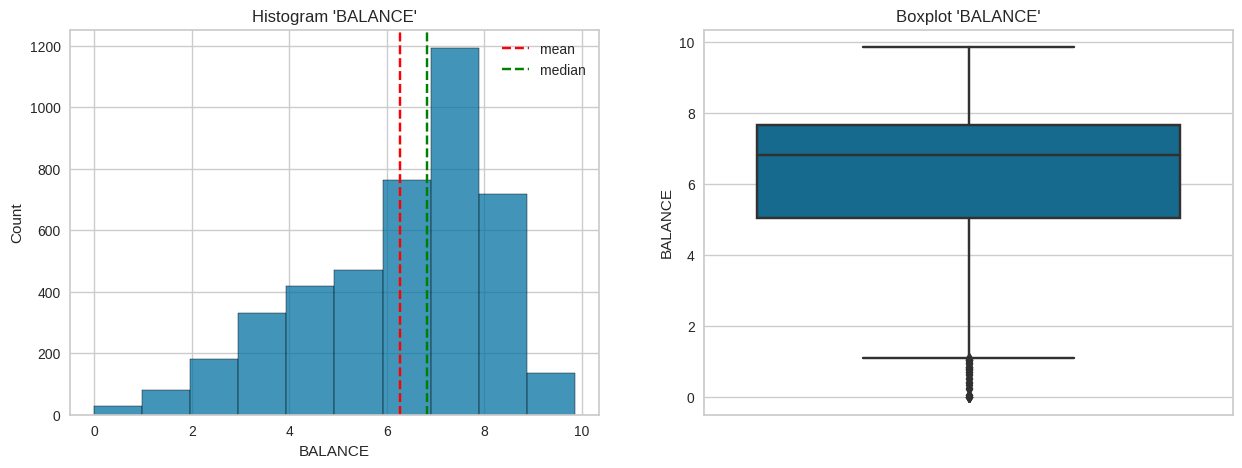

BALANCE Kurtosis: -0.053262048557534136
BALANCE Skewness: -0.7772966876176872
Columns 'BALANCE' is moderately left skewed


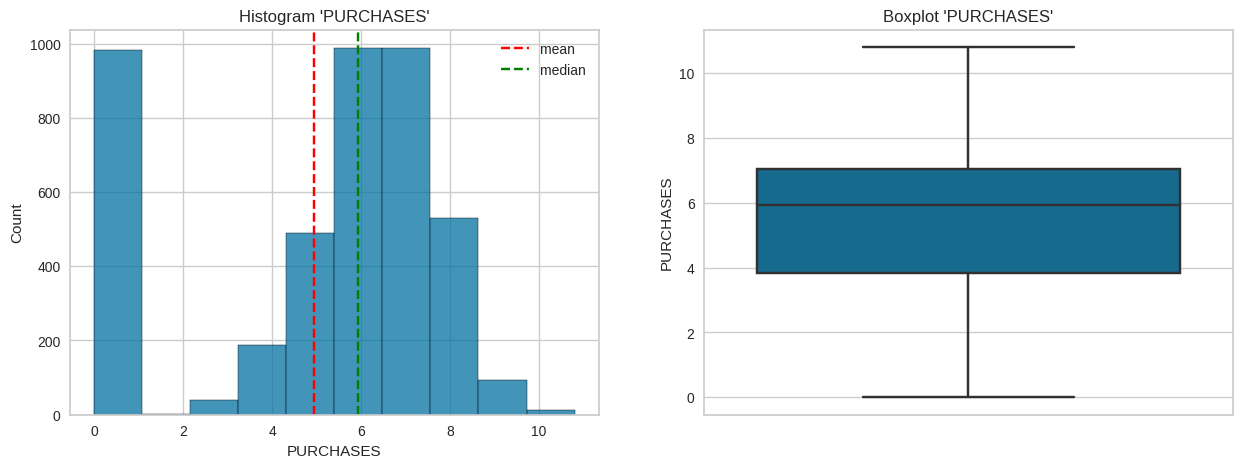

PURCHASES Kurtosis: -0.7885701051738714
PURCHASES Skewness: -0.787029970934612
Columns 'PURCHASES' is moderately left skewed


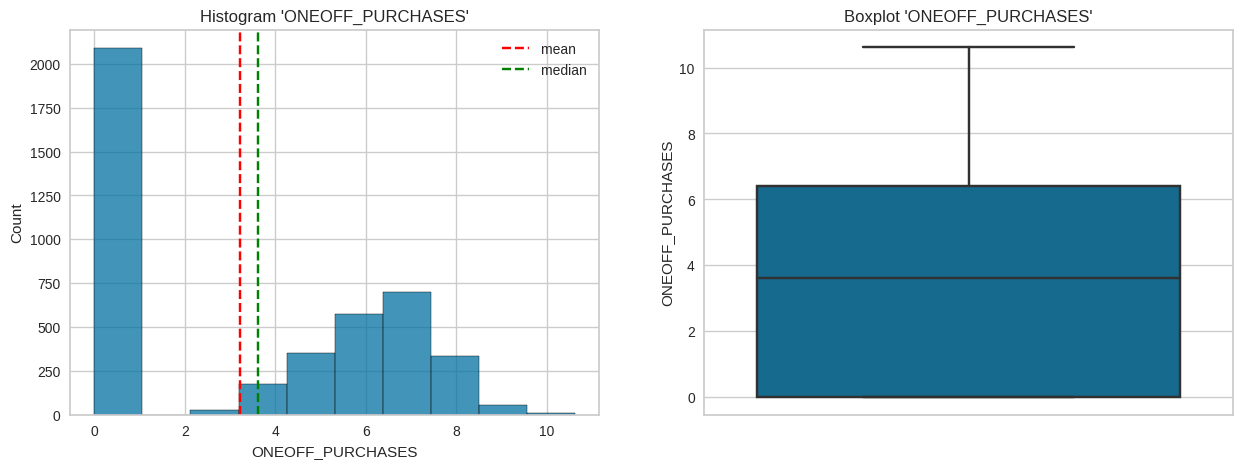

ONEOFF_PURCHASES Kurtosis: -1.6954393466856994
ONEOFF_PURCHASES Skewness: 0.1858817845715558
Columns 'ONEOFF_PURCHASES' is normally distributed


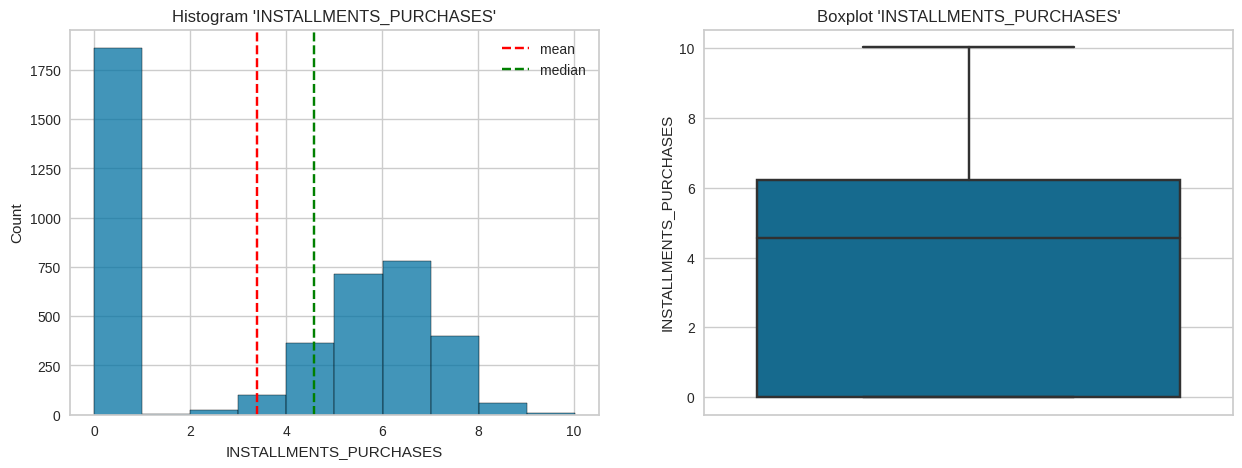

INSTALLMENTS_PURCHASES Kurtosis: -1.7397908099142156
INSTALLMENTS_PURCHASES Skewness: -0.04812807635438331
Columns 'INSTALLMENTS_PURCHASES' is normally distributed


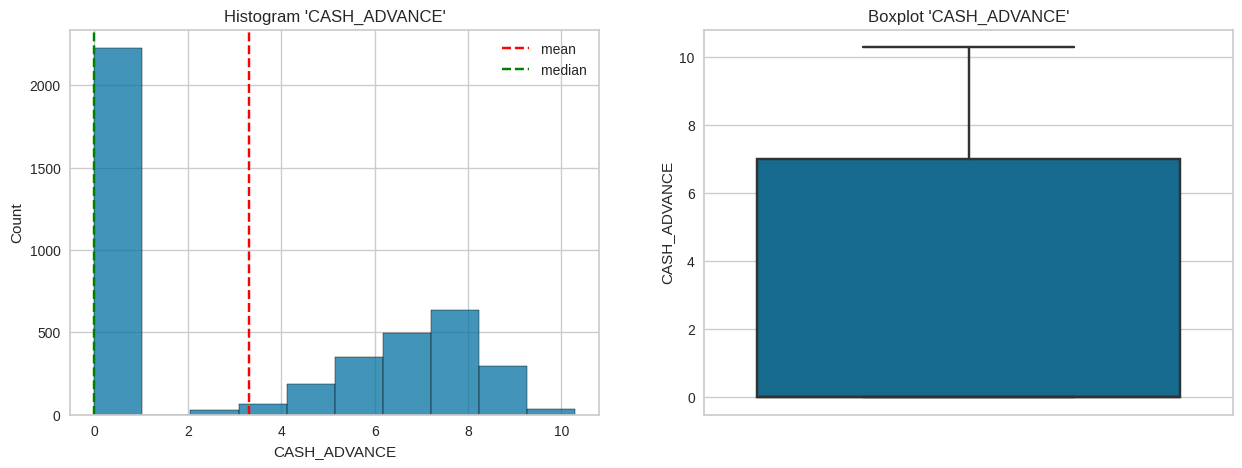

CASH_ADVANCE Kurtosis: -1.7207444174513353
CASH_ADVANCE Skewness: 0.2680250157644583
Columns 'CASH_ADVANCE' is normally distributed


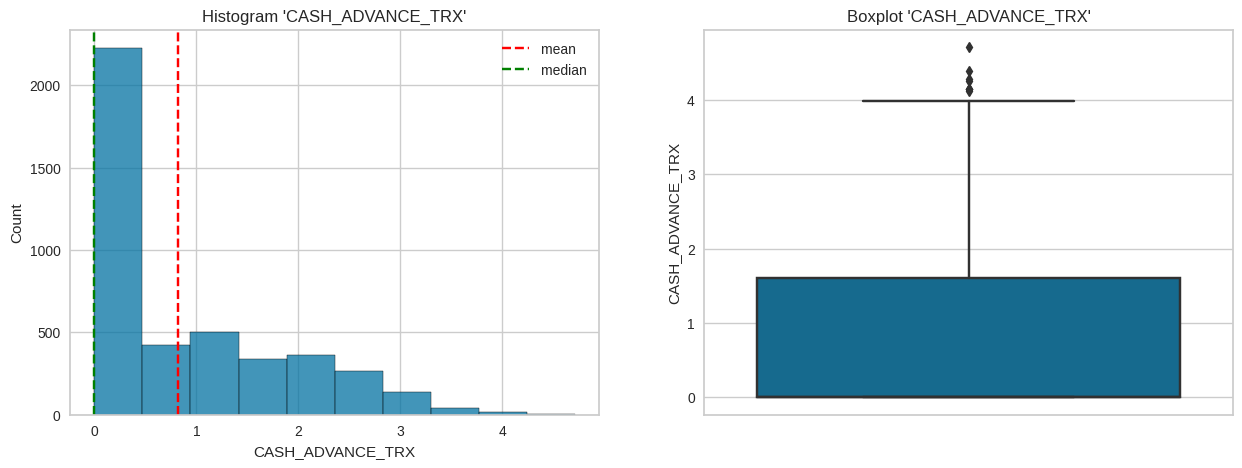

CASH_ADVANCE_TRX Kurtosis: -0.2973119306698706
CASH_ADVANCE_TRX Skewness: 0.9197301309353804
Columns 'CASH_ADVANCE_TRX' is moderately right skewed


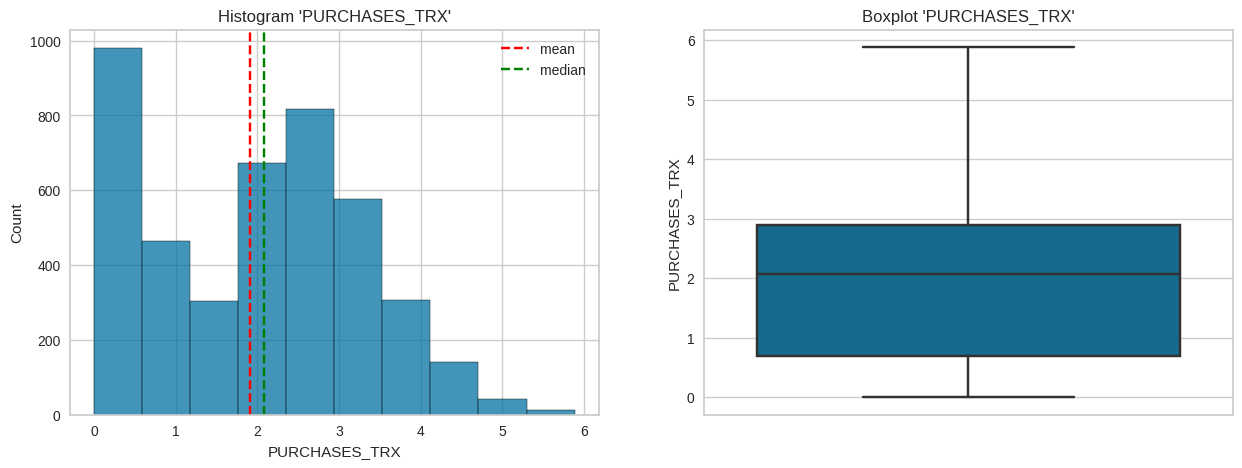

PURCHASES_TRX Kurtosis: -0.996062176890812
PURCHASES_TRX Skewness: -0.0019866348420137904
Columns 'PURCHASES_TRX' is normally distributed


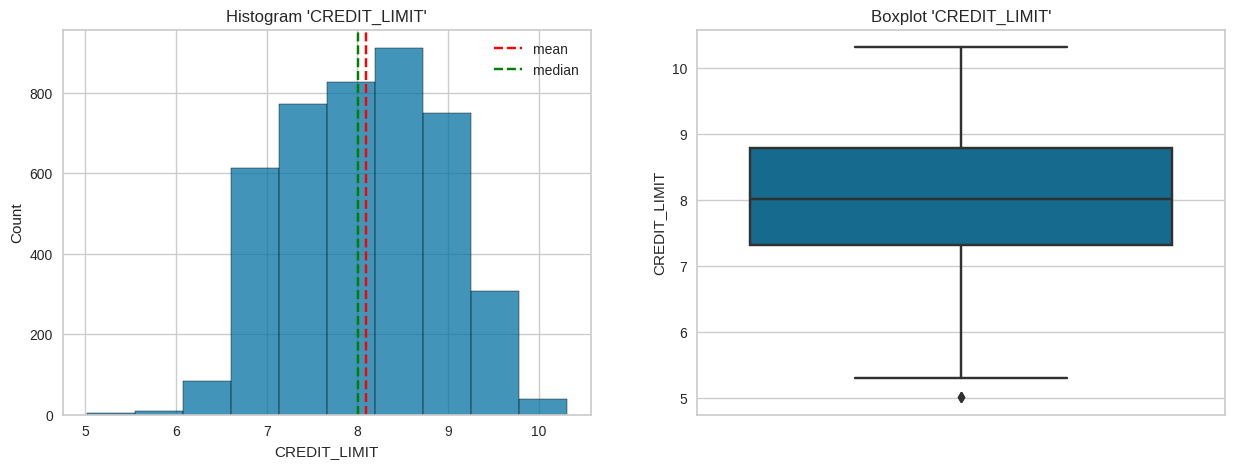

CREDIT_LIMIT Kurtosis: -0.645896064733225
CREDIT_LIMIT Skewness: -0.09136552728421324
Columns 'CREDIT_LIMIT' is normally distributed


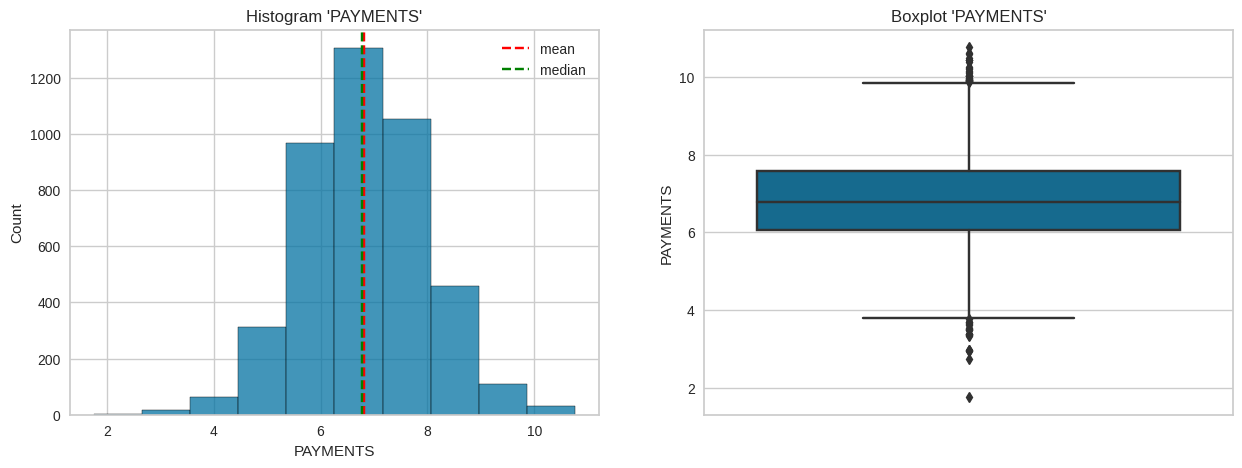

PAYMENTS Kurtosis: 0.2119295349173811
PAYMENTS Skewness: 0.043348201827928826
Columns 'PAYMENTS' is normally distributed


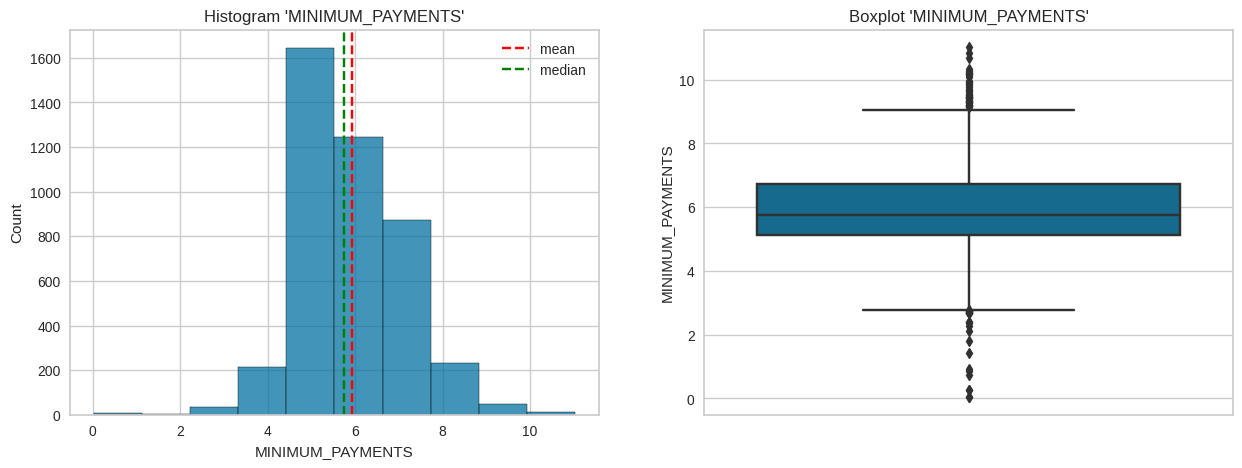

MINIMUM_PAYMENTS Kurtosis: 1.1613362348916212
MINIMUM_PAYMENTS Skewness: 0.2830904950433815
Columns 'MINIMUM_PAYMENTS' is normally distributed


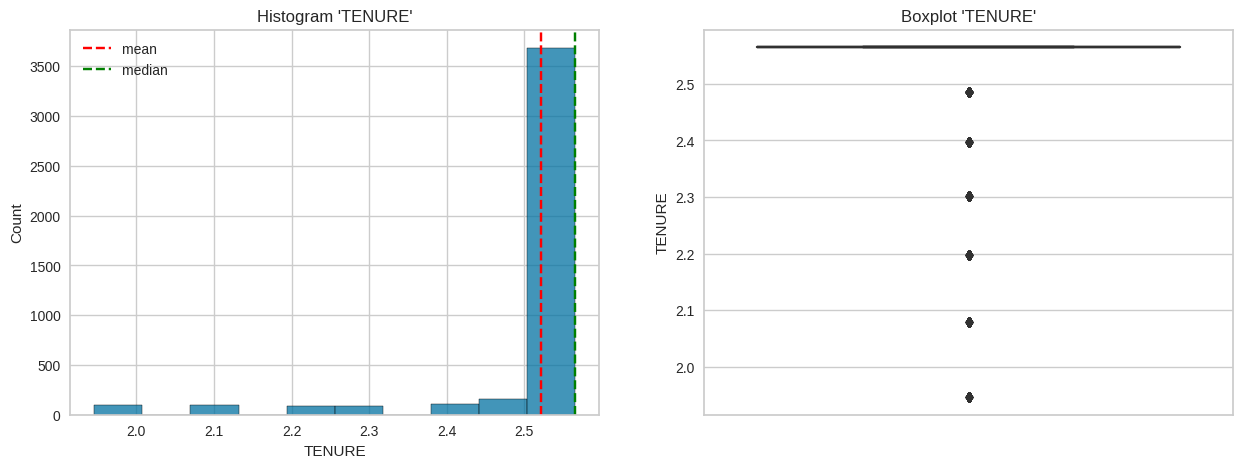

TENURE Kurtosis: 9.66668717870374
TENURE Skewness: -3.222588656119811
Columns 'TENURE' is highly left skewed


In [29]:
for i in range(len(scaled_num_col)):
    plot_diagnostic(df_train, scaled_num_col[i])

Kolom yang memiliki outlier diantaranya adalah balance, cash_advance_trx, credit_limit, payments, dan minimum_payments. Dikarenakan dataset sudah distribusi normal maka menggunakan methode capping gaussian.

In [30]:
# define kolom
cens_col = ['BALANCE', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# create the capper
winsorizer = Winsorizer(capping_method='gaussian',
                        tail = 'both',
                        fold = 1.5,
                        variables=cens_col)

# melakukan capping pada data train
df_train = winsorizer.fit_transform(df_train)

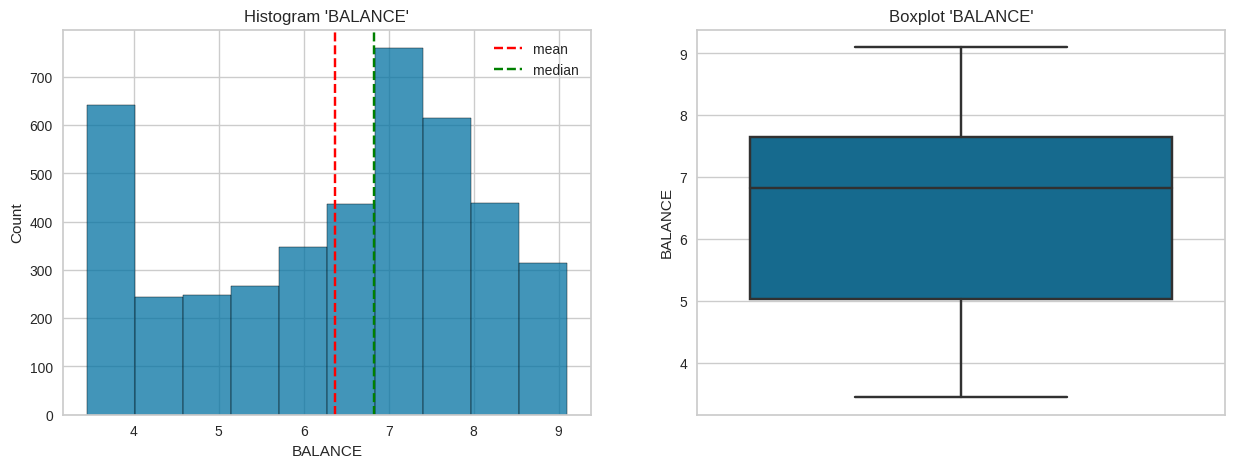

BALANCE Kurtosis: -0.9834353235355544
BALANCE Skewness: -0.4187329835047959
Columns 'BALANCE' is normally distributed


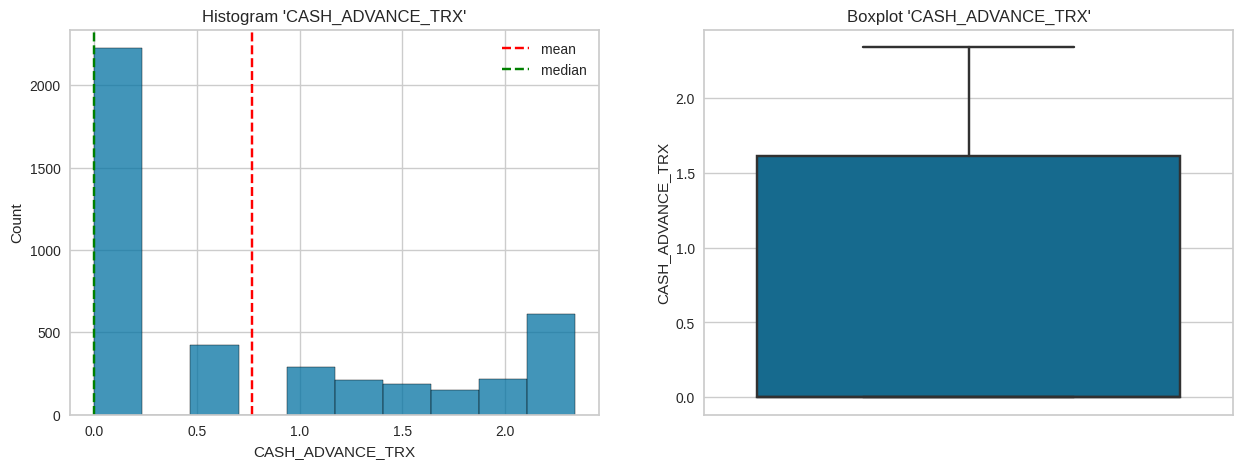

CASH_ADVANCE_TRX Kurtosis: -1.2192671132723953
CASH_ADVANCE_TRX Skewness: 0.6272442492483636
Columns 'CASH_ADVANCE_TRX' is moderately right skewed


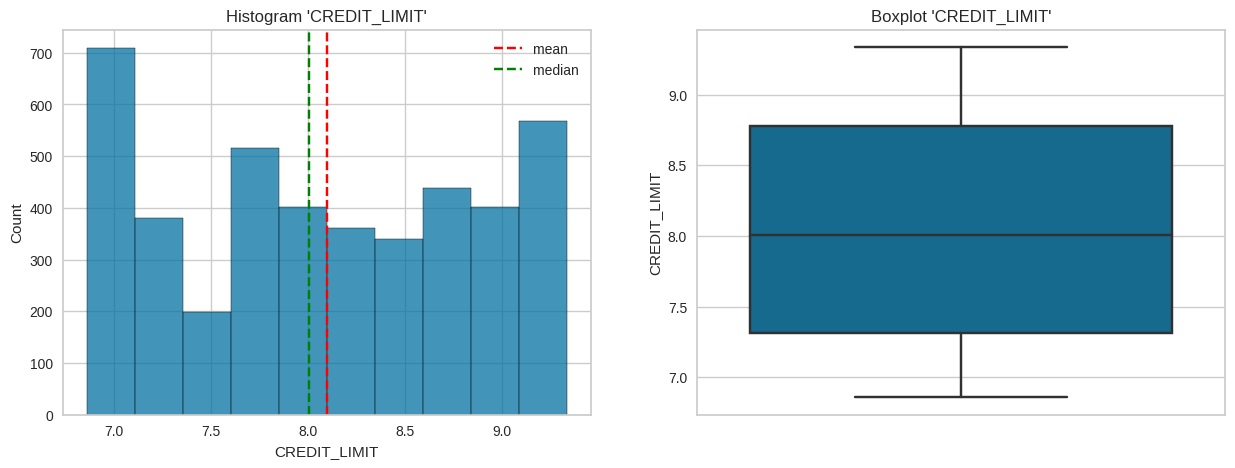

CREDIT_LIMIT Kurtosis: -1.2299606480512697
CREDIT_LIMIT Skewness: -0.013211274787683101
Columns 'CREDIT_LIMIT' is normally distributed


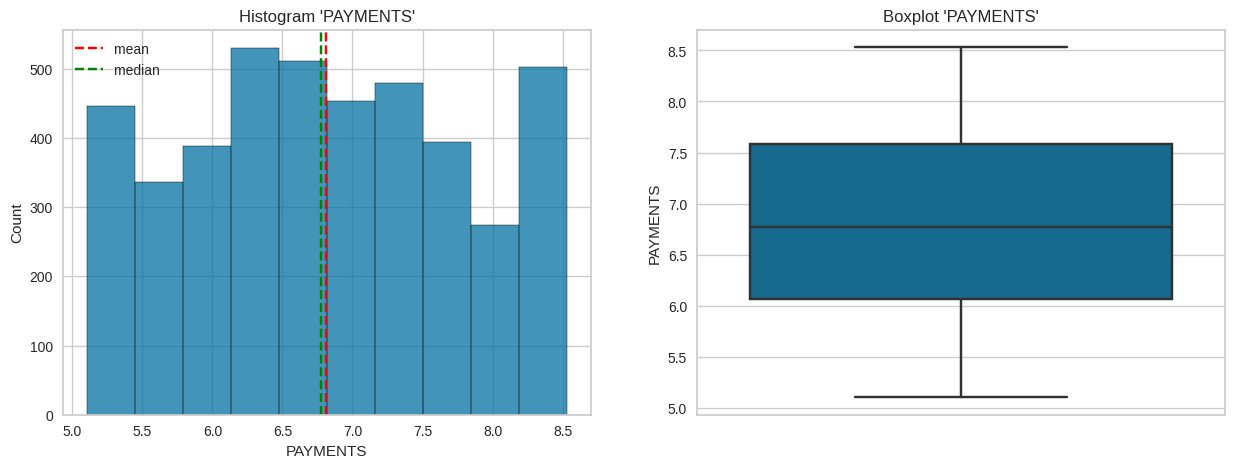

PAYMENTS Kurtosis: -0.9563382920645291
PAYMENTS Skewness: 0.04379508809315076
Columns 'PAYMENTS' is normally distributed


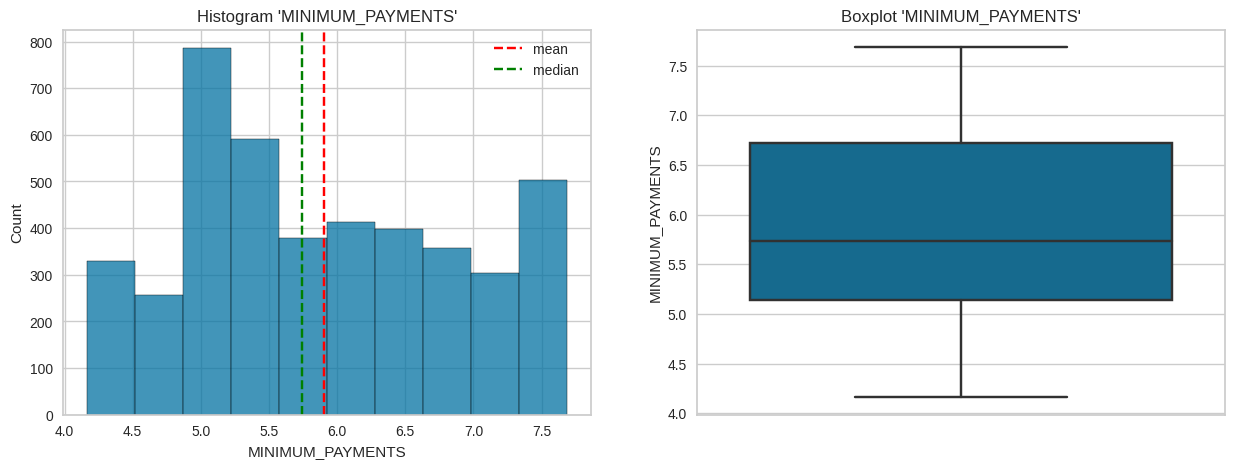

MINIMUM_PAYMENTS Kurtosis: -0.9959420900379441
MINIMUM_PAYMENTS Skewness: 0.2386367233187381
Columns 'MINIMUM_PAYMENTS' is normally distributed


In [31]:
# plot fitur setelah dilakukkan capping
for i in range(len(cens_col)):
    plot_diagnostic(df_train, cens_col[i])

## Scaling

Diketahui bahwa distribusi fitur-fitur diatas sudah terdistribusi normal, sehingga untuk scaler akan menggunakan standard scaler.

In [32]:
# melakukan scaling pada semua kolom di dataset model

scaler = StandardScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train))
df_train.columns = scaler.get_feature_names_out()
df_train.head()

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.549399  0.287716          -0.028482  -0.100677          0.440087   
1  0.040858 -0.139400           0.485810   0.491734          0.970530   
2  0.190207  0.353601           0.485810   0.802407          1.248706   
3  0.260830  0.803646           0.485810  -0.048801          0.486537   
4  0.353746 -0.188514          -2.500035   0.737613          1.190689   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -1.100724     -0.931192            -0.896683   
1               -1.100724     -0.931192            -0.896683   
2               -1.100724     -0.931192            -0.896683   
3               -1.100724     -0.931192            -0.896683   
4               -1.100724     -0.931192            -0.896683   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.198616                         -0.970922   
1                   -0.198616                         -0.970922   
2                   -0.198616                         -0.970922   
3                   -0.198616                         -0.970922   
4                   -0.198616                         -0.970922   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.728019          -0.85338       -0.89079     -1.546689   
1               -0.728019          -0.85338       -0.89079     -1.546689   
2               -0.728019          -0.85338       -0.89079     -1.020286   
3               -0.728019          -0.85338       -0.89079     -0.356898   
4               -0.728019          -0.85338       -0.89079     -1.310008   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -1.438408          0.115075         -0.576311 -2.509449  
1 -1.258041         -0.870969         -0.576311 -2.509449  
2 -0.827851         -0.471585         -0.576311 -2.509449  
3 -0.973747          0.663233         -0.576311 -2.509449  
4 -1.713227         -1.732289         -0.576311 -2.509449

In [33]:
# for inference
df_infer = df_train.sample(n=100,random_state=42)
df_infer.to_csv("inference.csv")

## PCA

In [34]:
# PCA
pca = PCA()
pca.fit(df_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.33368826, 0.54290133, 0.63409925, 0.70532847, 0.77085636,
       0.82654262, 0.86682057, 0.9054915 , 0.93398292, 0.95262545,
       0.96641619, 0.97606685, 0.98385119, 0.98939258, 0.99381082,
       0.99638745, 0.99864951, 1.        ])

In [35]:
# Menampilkan hasil n_componen
d = np.argmax(cumsum >= 0.9) + 1
print(d)

8


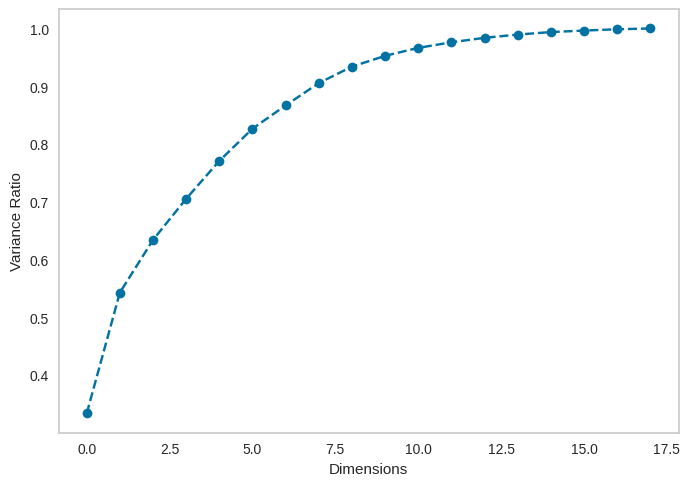

In [36]:
plt.figure()
plt.plot(cumsum,'o--')
plt.xlabel("Dimensions")
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

Dari grafik di atas, saya menetapkan untuk mereduksi features menjadi 8 principal components, karena dengan jumlah PC=8 kita masih mendapatkan informasi 90% dari dataset model.

In [37]:
# membuat dataset model setelah PCA

pca = PCA(n_components=8)
pca_reduced = pd.DataFrame(pca.fit_transform(df_train))
pca_reduced.columns = pca.get_feature_names_out()
pca_reduced

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0     1.001262 -1.886890  0.681029 -1.343024  2.698022  0.431698  1.055046   
1     0.478517 -2.025244  1.047507 -1.102307  2.962155 -0.222126  0.670615   
2     0.396769 -1.265035  1.298895 -1.148517  2.679714 -0.302177  1.118602   
3     1.043396 -0.817286  0.826035 -1.498509  2.091367 -0.252031  1.878943   
4     0.243950 -3.241785  2.037530 -0.033604  2.676328 -0.340883  1.406020   
...        ...       ...       ...       ...       ...       ...       ...   
4311  4.064490 -0.144126 -0.543167  0.946270  0.325415 -0.585455 -1.194477   
4312  3.914396  0.469021  0.139400  1.659312 -0.796714 -0.979722 -0.120297   
4313  0.096449  3.679901  0.106785  1.244374  1.103182 -0.379597 -0.055282   
4314  1.447984  3.498206  0.993228  0.702994  1.239996 -0.495852 -0.423386   
4315  0.076668  3.138555 -1.590501  1.825655  0.387507 -0.214210 -0.357669   

          pca7  
0    -0.698297  
1    -0.782537  
2    -0.823986  
3    -1.196731  
4     1.307624  
...        ...  
4311 -0.381535  
4312 -0.348709  
4313  0.674715  
4314  0.296369  
4315  0.822896  

[4316 rows x 8 columns]

<Axes: xlabel='0', ylabel='1'>

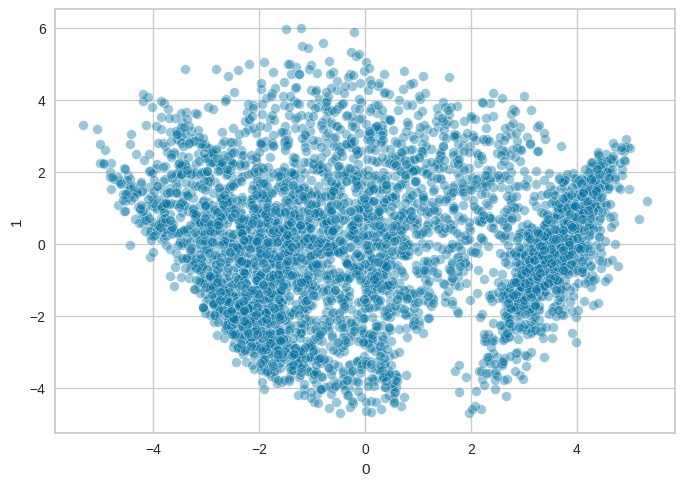

In [38]:
# for visualization, only 8 PC's saved
pca_viz = PCA(n_components=8)
X_viz = pd.DataFrame(pca_viz.fit_transform(pca_reduced))
sns.scatterplot(x=X_viz[0], y=X_viz[1], alpha=0.4)

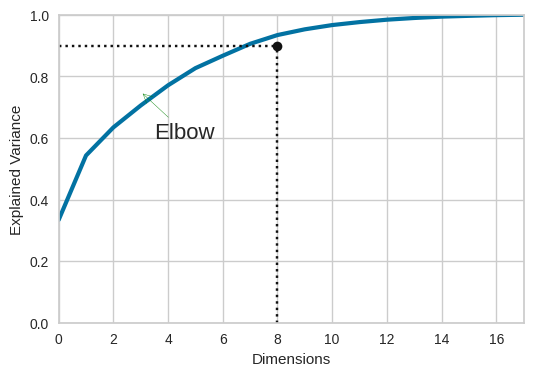

In [39]:
# check elbow with visualization
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 17, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.9], "k:")
plt.plot([0, d], [0.9, 0.9], "k:")
plt.plot(d, 0.9, "ko")
plt.annotate("Elbow", xy=(3, 0.75), xytext=(3.5, 0.6),
             arrowprops=dict(arrowstyle="->",color='green'), fontsize=16)
plt.grid(True)
plt.show()

# Preprocess

- Diketahui bahwa handling outlier menggunakan capping gaussian
- Scaler yang digunakan adalah StandardScaler dikarenakan distribusi fitur-fitur diatas sudah terdistribusi normal
- PCA yang digunakan adalah 8

In [40]:
pipe = Pipeline([
    ('wins', Winsorizer(capping_method='gaussian', fold=1.5, tail='both')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=.8))
])

In [41]:
pca_reduced.head()

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0  1.001262 -1.886890  0.681029 -1.343024  2.698022  0.431698  1.055046   
1  0.478517 -2.025244  1.047507 -1.102307  2.962155 -0.222126  0.670615   
2  0.396769 -1.265035  1.298895 -1.148517  2.679714 -0.302177  1.118602   
3  1.043396 -0.817286  0.826035 -1.498509  2.091367 -0.252031  1.878943   
4  0.243950 -3.241785  2.037530 -0.033604  2.676328 -0.340883  1.406020   

       pca7  
0 -0.698297  
1 -0.782537  
2 -0.823986  
3 -1.196731  
4  1.307624

In [42]:
X_tr = pipe.fit_transform(pca_reduced)
X_tr

array([[-0.36998905, -0.04611598,  1.8273598 , ..., -0.35668572,
        -0.04536861,  0.56462299],
       [-0.69933214, -0.49244577,  1.76266878, ..., -0.49368572,
         0.70244451,  0.60237826],
       [-0.43426379,  0.09142016,  2.00899254, ..., -0.55804425,
         0.90093027,  0.55540637],
       ...,
       [-1.36019797,  1.14300633, -0.71929733, ...,  0.63028128,
        -0.00985384, -0.26129256],
       [-1.72088805,  0.70031186,  0.4504093 , ...,  0.67985852,
         0.0910419 , -0.37173797],
       [-0.82047948,  0.78693596, -2.01632432, ...,  0.3509353 ,
        -0.81517998, -0.7873764 ]])

# Modeling

In [43]:
kmeans = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_tr)
                for k in range(1, 8)]
inertia = [model.inertia_ for model in kmeans]

# Model Evaluation

## Elbow Method

Untuk melihat jumlah cluster atau nilai k yang optimal.

### Before PCA

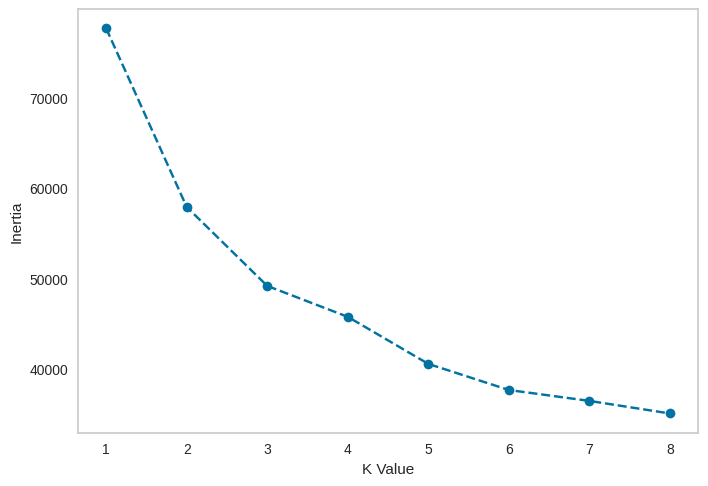

In [44]:
# mencari nilai K di mana penurunan nilai inersia mulai melambat

K=[1,2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i,n_init='auto',random_state=42).fit(df_train).inertia_ for i in K]
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Secara visualisasi dari hasil grafik di atas, penurunan nilai K mulai melambat terjadi antara K=3 atau K=4. Untuk memastikan nilai K tersebut maka dapat melakukan langkah selanjutnya menggunakan KneeLocator.

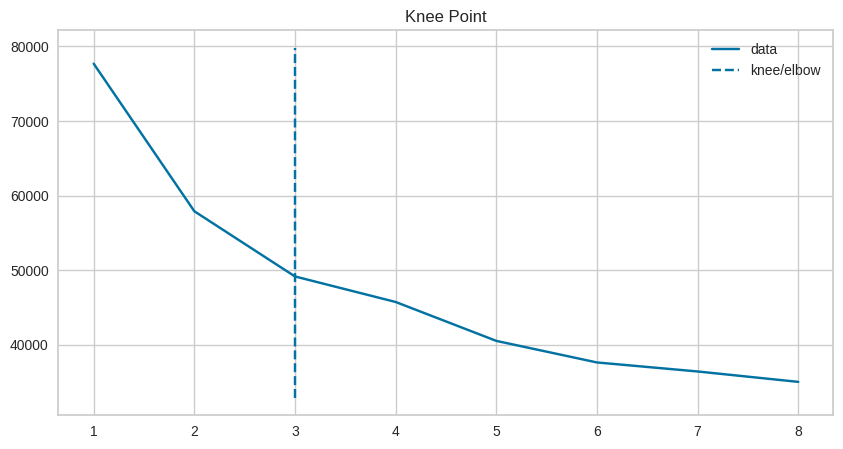

In [45]:
# menentukan nilai K optimal

kneedle = KneeLocator(K,inertia,curve="convex", direction='decreasing')
kneedle.plot_knee(figsize=(10,5))

Dari hasil KneeLocator didapatkan nilai K=3. Ini berarti menurut elbow method
sebelum PCA, pembagian dataset menjadi 3 cluster akan menghasilkan performa clustering yang maksimal.

### After PCA

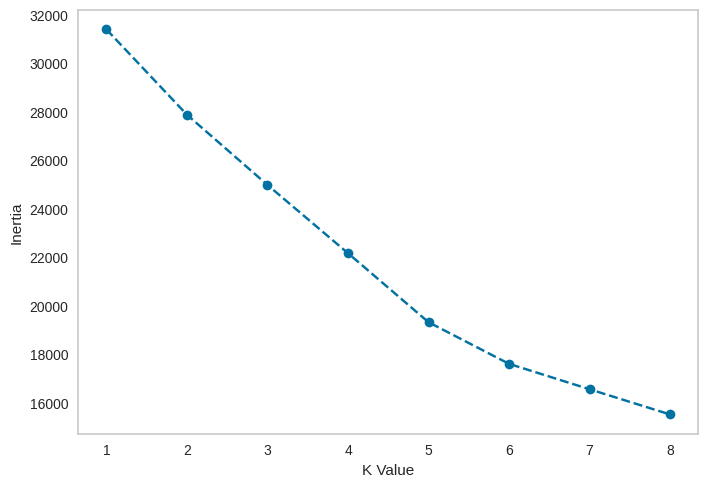

In [46]:
K=[1,2,3,4,5,6,7,8]
inertia_pca=[KMeans(n_clusters=i,n_init='auto',random_state=42).fit(X_tr).inertia_ for i in K]
plt.plot(K,inertia_pca,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Secara visual dari hasil grafik diatas, penurunan nilai K mulai melambat terjadi antara K=5 atau K=6. Untuk memastikan nilai K tersebut kita dapat melakukan langkah selanjutnya menggunakan KneeLocator.

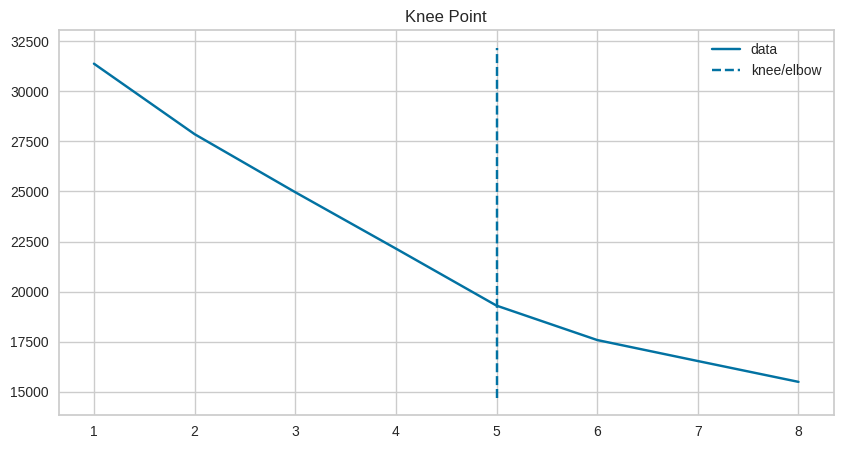

In [47]:
# menentukan nilai K optimal dari dataset hasil PCA

kneedle_pca = KneeLocator(K,inertia_pca,curve="convex", direction='decreasing')
kneedle_pca.plot_knee(figsize=(10,5))

Dari hasil KneeLocator didapat nilai K=5. Ini berarti menurut elbow method setelah PCA, pembagian dataset menjadi 5 cluster akan menghasilkan performa clustering yang maksimal.

## Silhouette Score

In [48]:
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters, n_init=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

### Before PCA

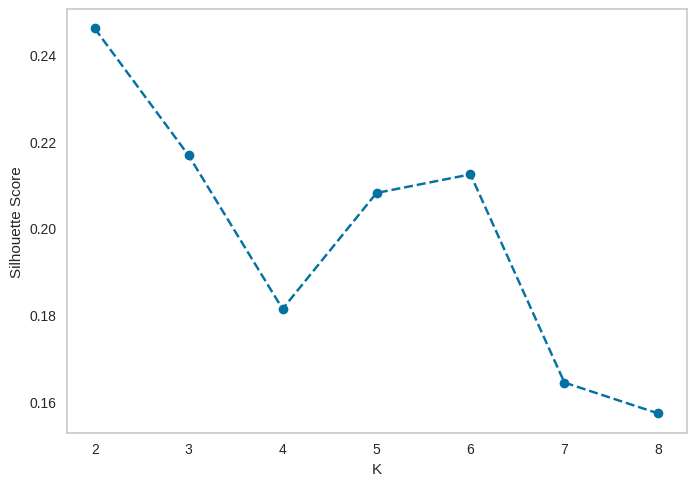

In [49]:
# mencari silhouette score

K=[2,3,4,5,6,7,8]
s_score_slc=[silhouette_score(df_train, KMeans(n_clusters=i,n_init='auto',random_state=42).fit(df_train).labels_) for i in K]

plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Secara visual dari hasil grafik diatas, penurunan nilai K terjadi di K=4. Namun untuk memastikan nilai K tersebut kita dapat melakukan langkah selanjutnya menggunakan KneeLocator.

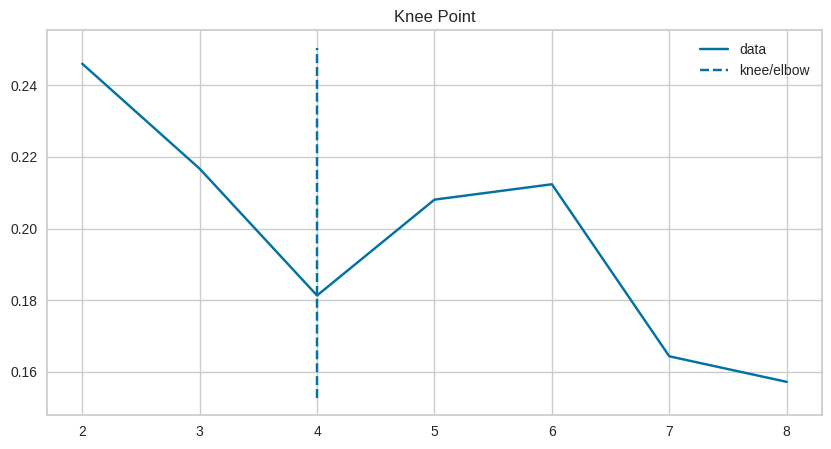

In [50]:
kneedle_sil = KneeLocator(K,s_score_slc,curve="convex", direction='decreasing')
kneedle_sil.plot_knee(figsize=(10,5))

Dari hasil KneeLocator didapat nilai K=4. Ini berarti menurut elbow method sebelum PCA, pembagian dataset menjadi 4 cluster akan menghasilkan performa clustering yang maksimal.

For n_clusters = 2 The average silhouette_score is : 0.24602542434817515
For n_clusters = 3 The average silhouette_score is : 0.21681119094384085
For n_clusters = 4 The average silhouette_score is : 0.20346969173313387
For n_clusters = 5 The average silhouette_score is : 0.2082006015680344
For n_clusters = 6 The average silhouette_score is : 0.21245175915753528
For n_clusters = 7 The average silhouette_score is : 0.21489015028609512
For n_clusters = 8 The average silhouette_score is : 0.20525304598739344


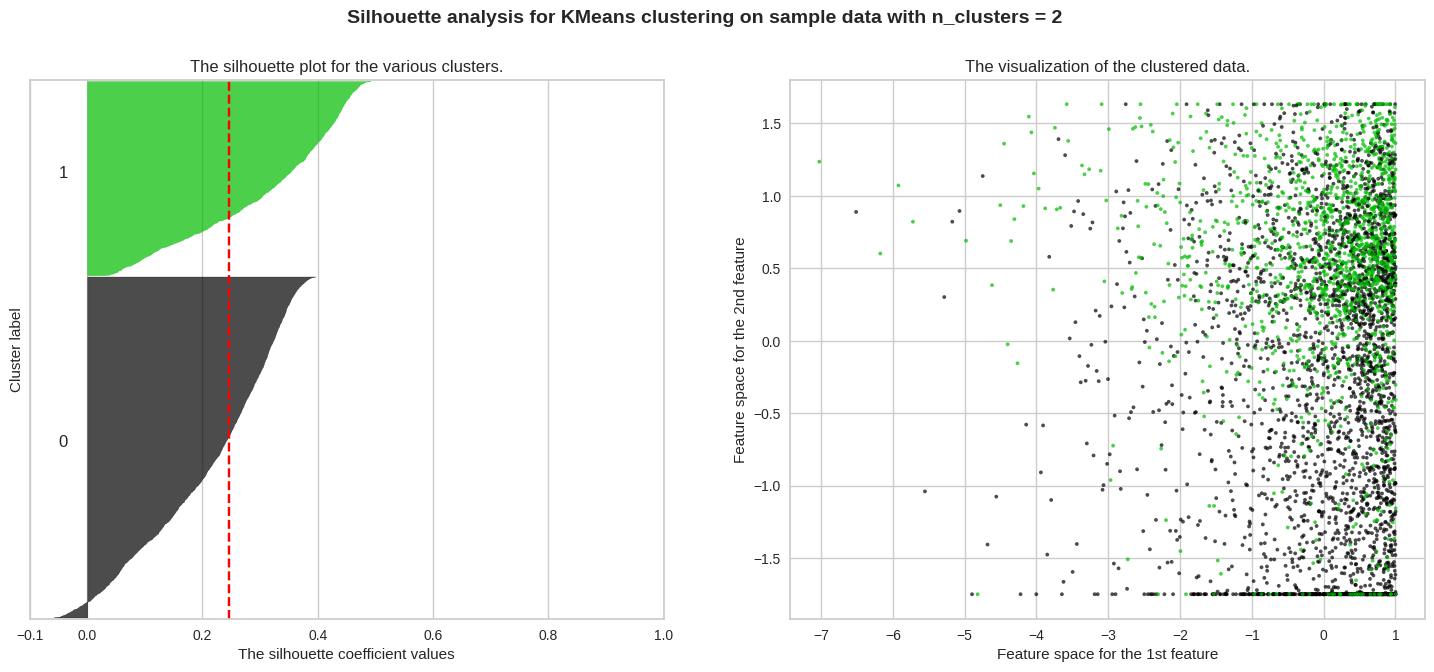

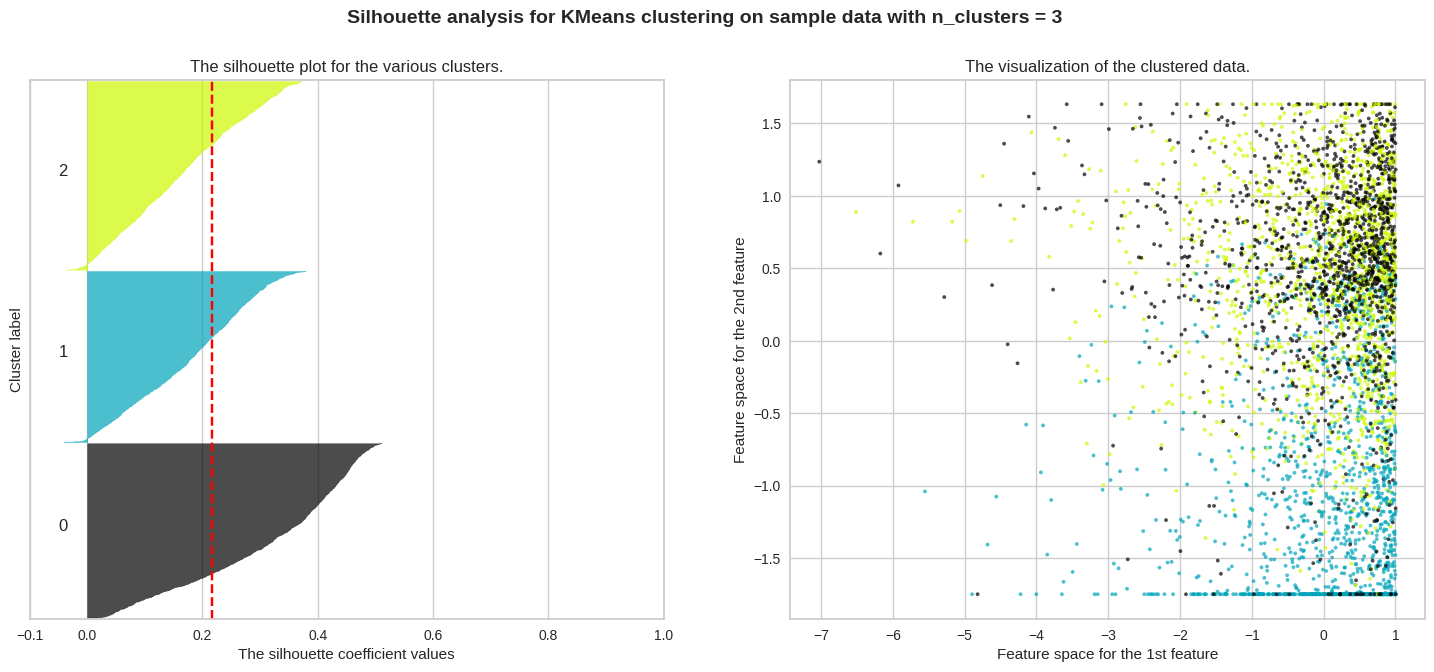

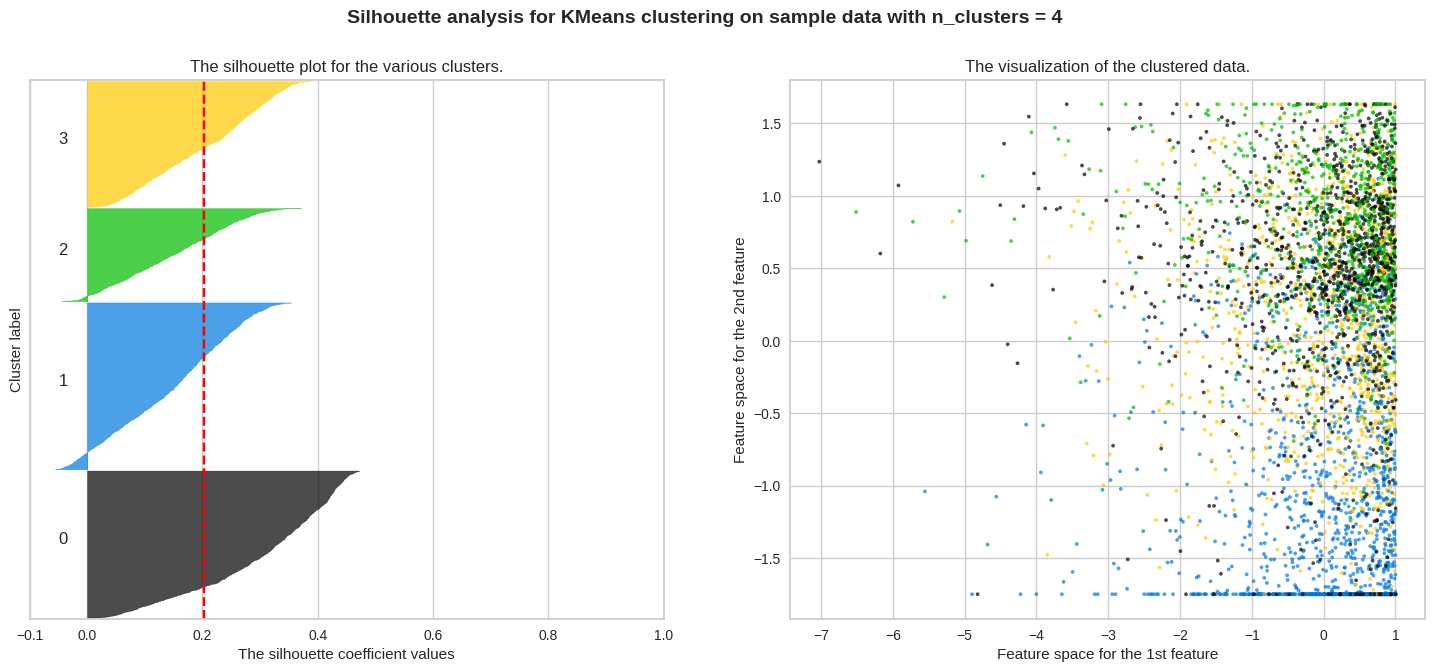

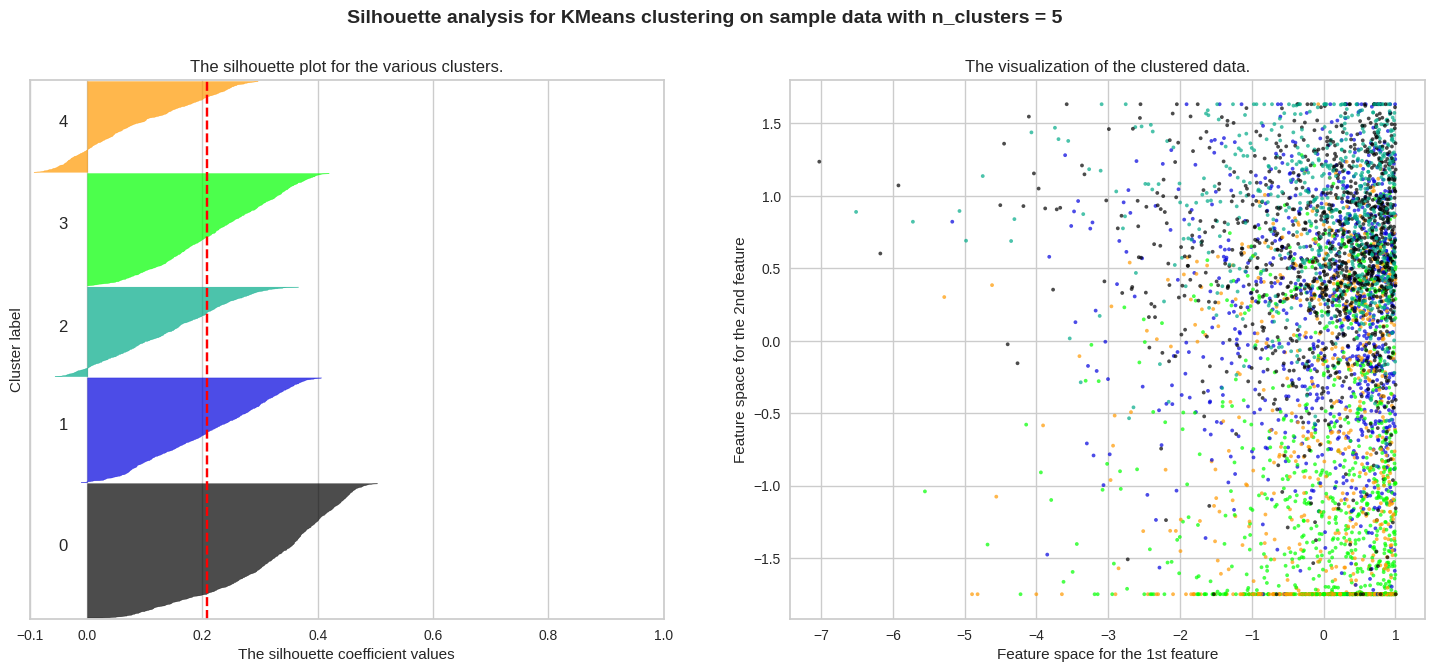

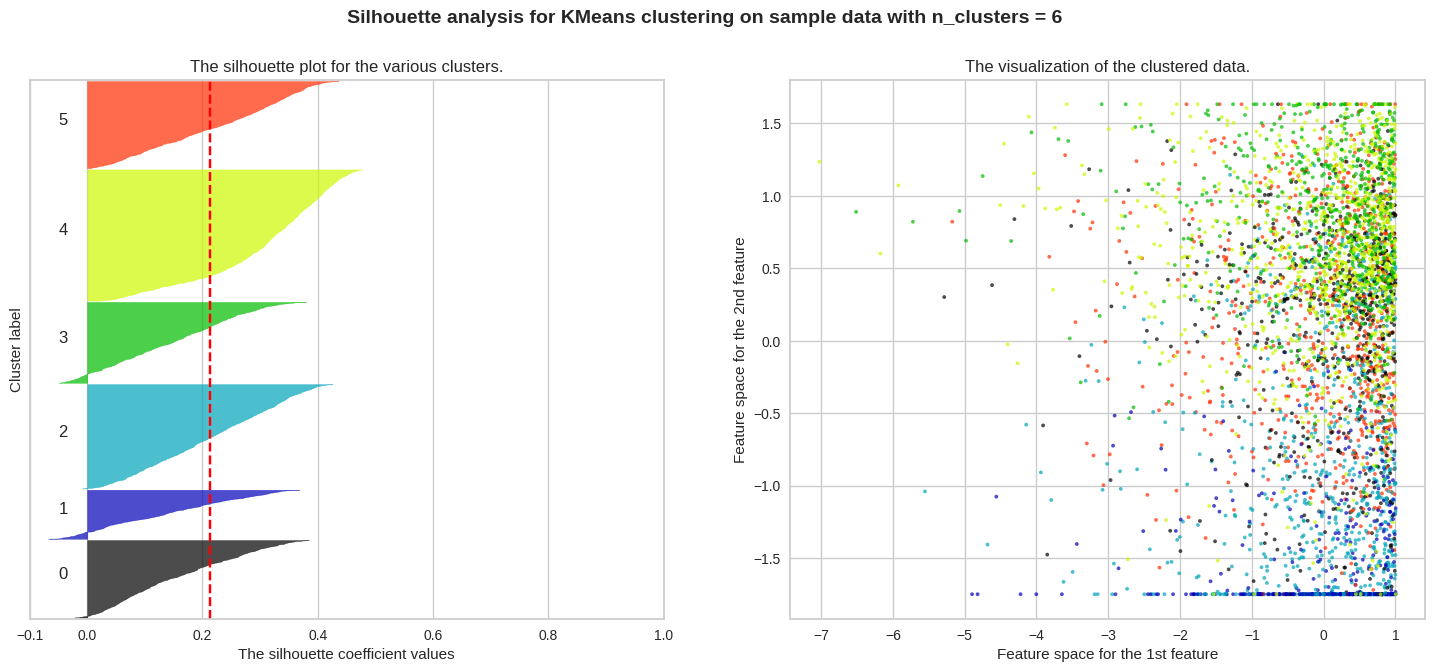

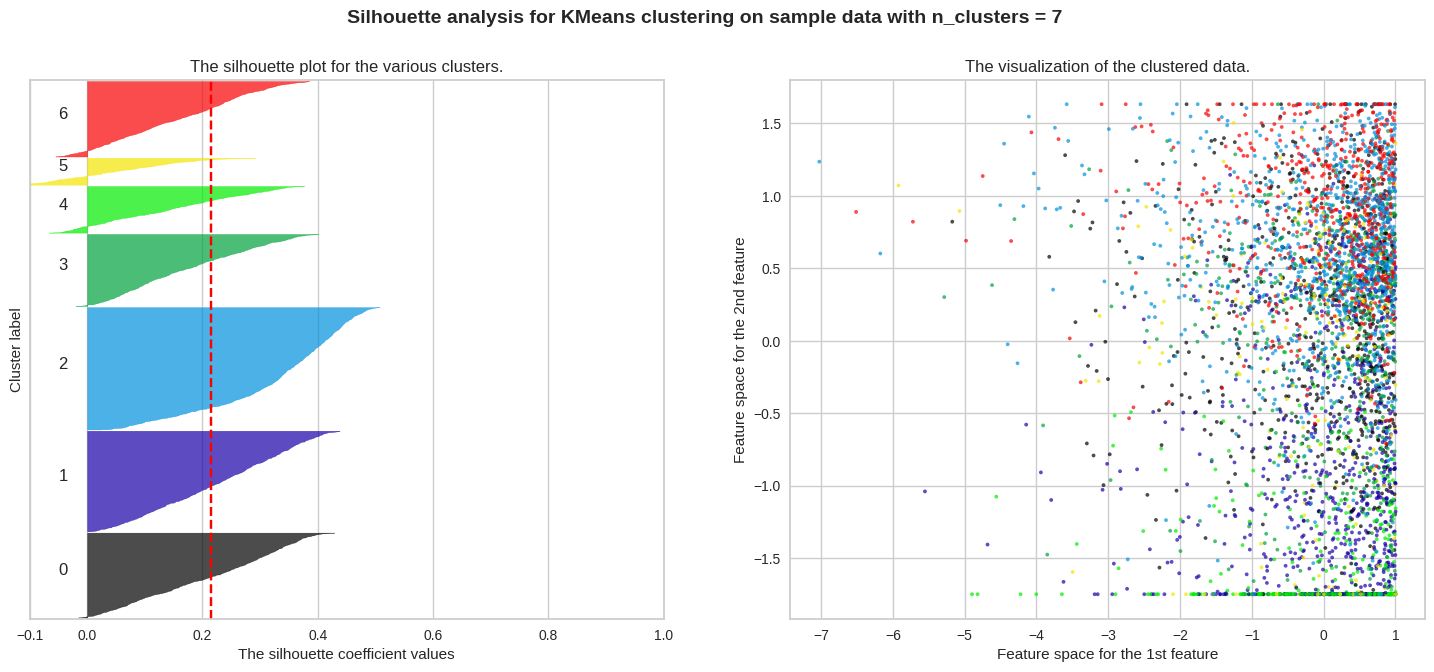

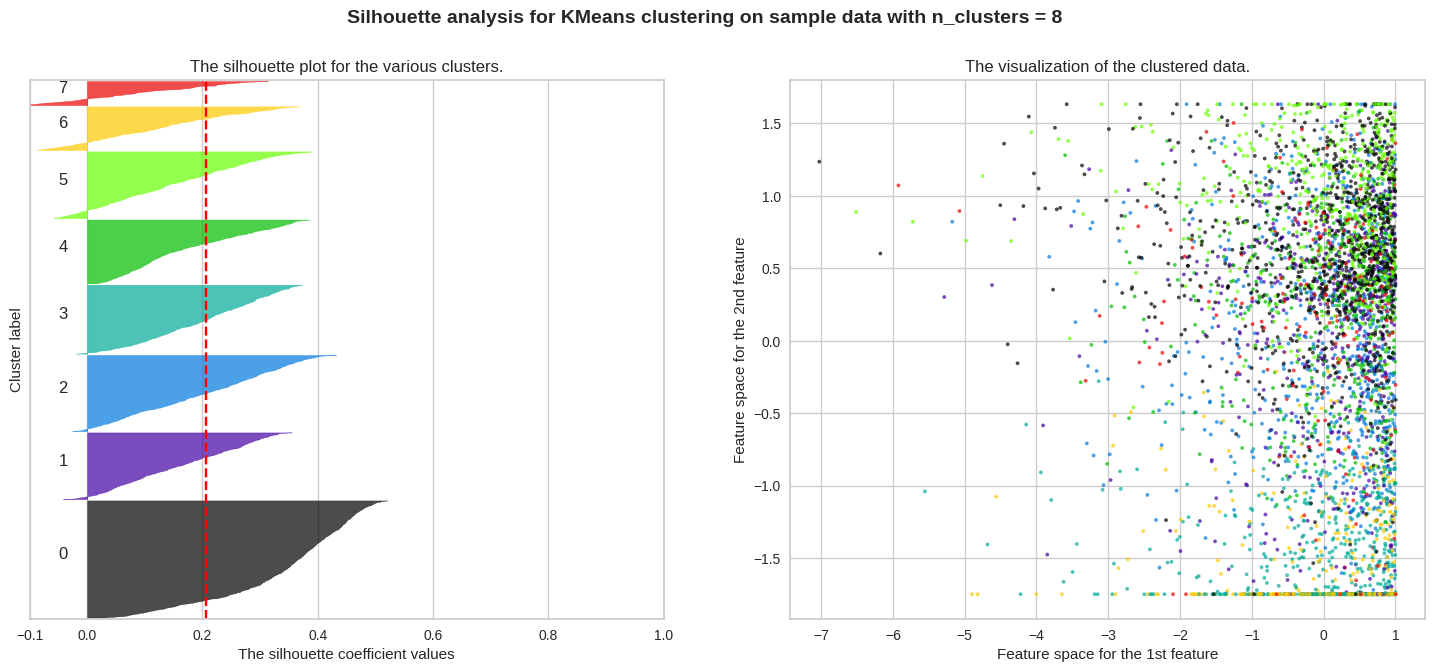

In [51]:
K = [2,3,4,5,6,7,8]
plot_silhouette(KMeans,K,df_train.values,'KMeans')

### After PCA

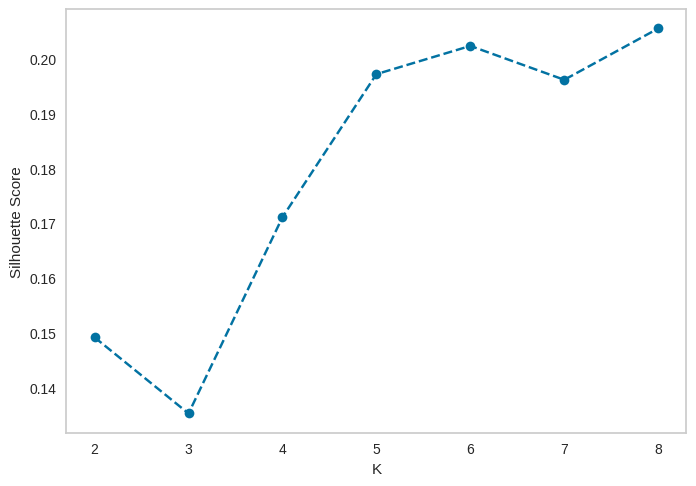

In [52]:
K=[2,3,4,5,6,7,8]
s_score_slc_pca=[silhouette_score(X_tr, KMeans(n_clusters=i,n_init='auto',random_state=34).fit(X_tr).labels_) for i in K]

plt.plot(K,s_score_slc_pca,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Secara visual dari hasil grafik diatas, penurunan nilai K terjadi di K=3. Namun untuk memastikan nilai K tersebut kita dapat melakukan langkah selanjutnya menggunakan KneeLocator.

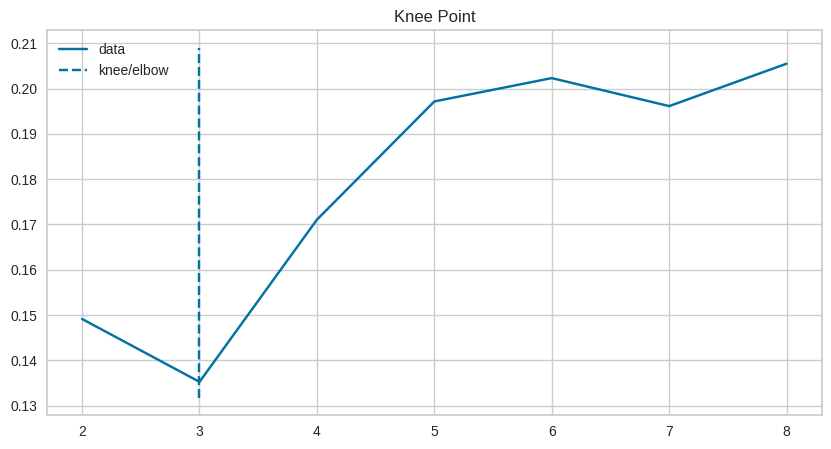

In [53]:
kneedle_sil_pca = KneeLocator(K,s_score_slc_pca,curve="convex", direction='decreasing')
kneedle_sil_pca.plot_knee(figsize=(10,5))

Dari hasil KneeLocator didapat nilai K=3. Ini berarti menurut elbow method setelah PCA, pembagian dataset menjadi 3 cluster akan menghasilkan performa clustering yang maksimal.

For n_clusters = 2 The average silhouette_score is : 0.13314770025439182
For n_clusters = 3 The average silhouette_score is : 0.15986810229296344
For n_clusters = 4 The average silhouette_score is : 0.18547320749101281
For n_clusters = 5 The average silhouette_score is : 0.1971537074607393
For n_clusters = 6 The average silhouette_score is : 0.20213598404913233
For n_clusters = 7 The average silhouette_score is : 0.19292714665692945
For n_clusters = 8 The average silhouette_score is : 0.20194963243234648


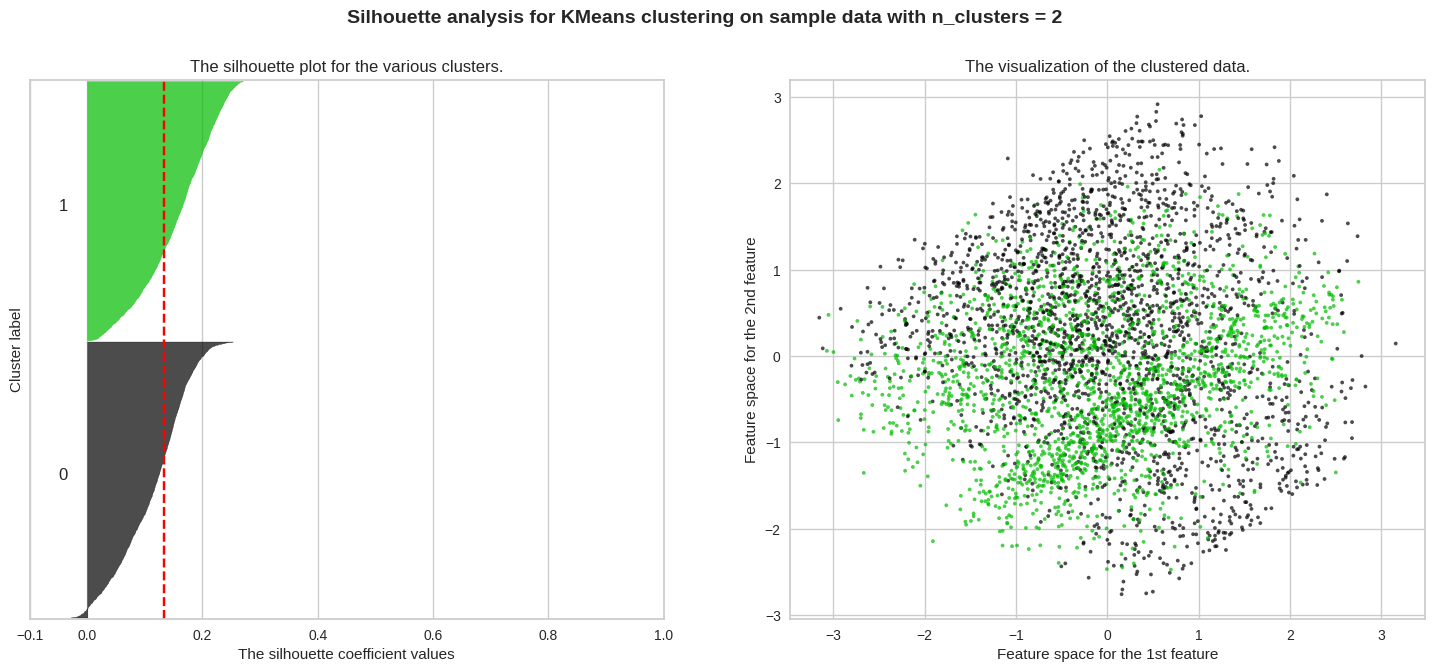

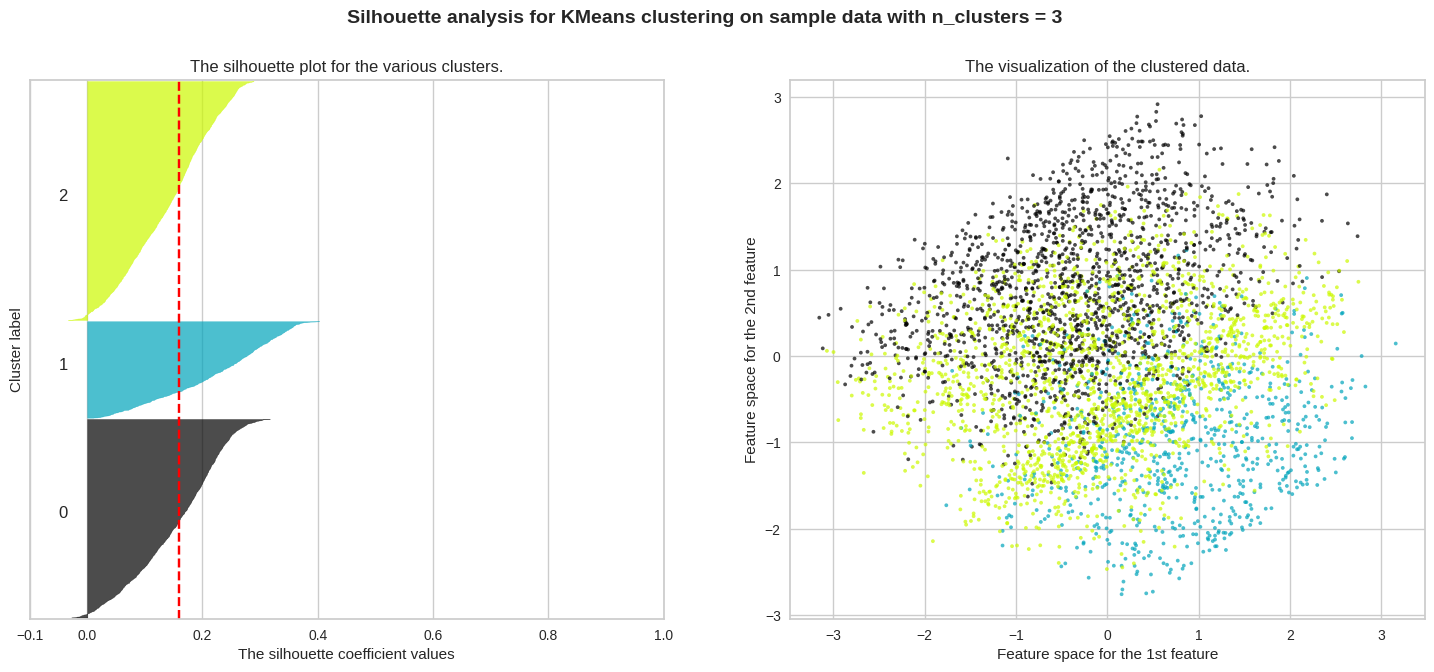

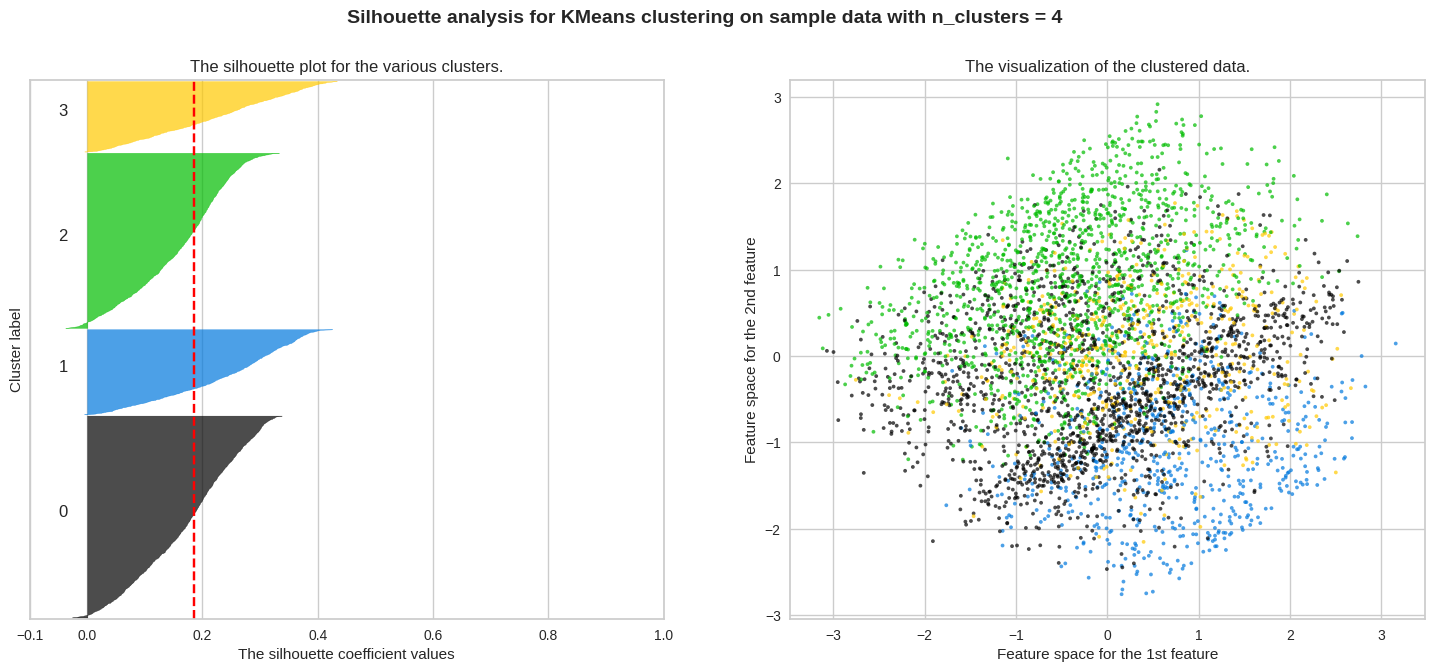

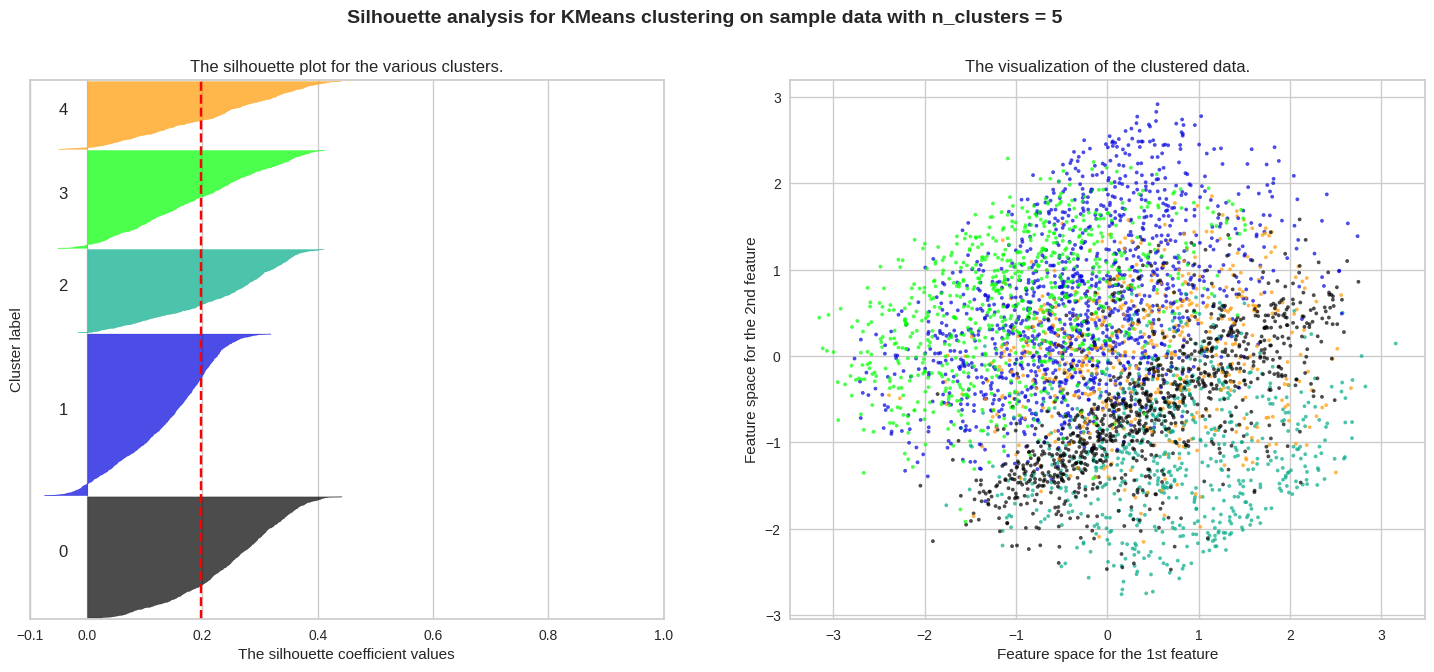

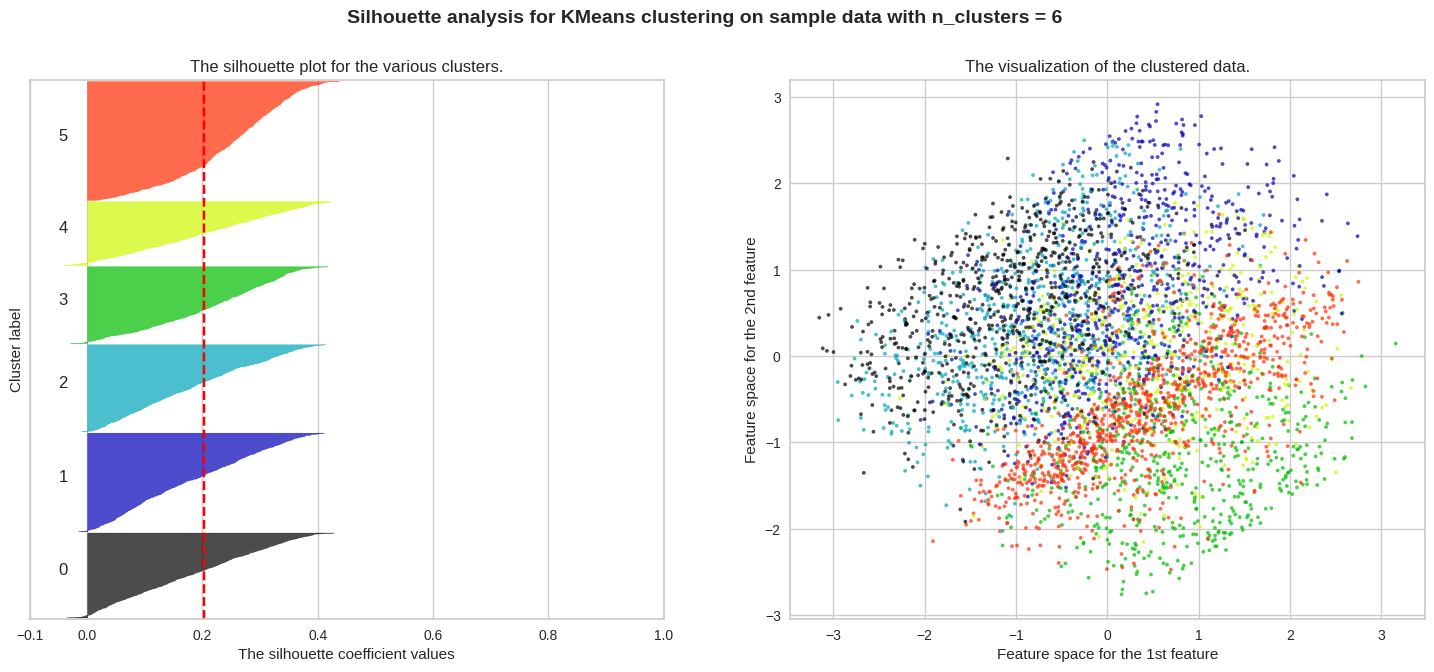

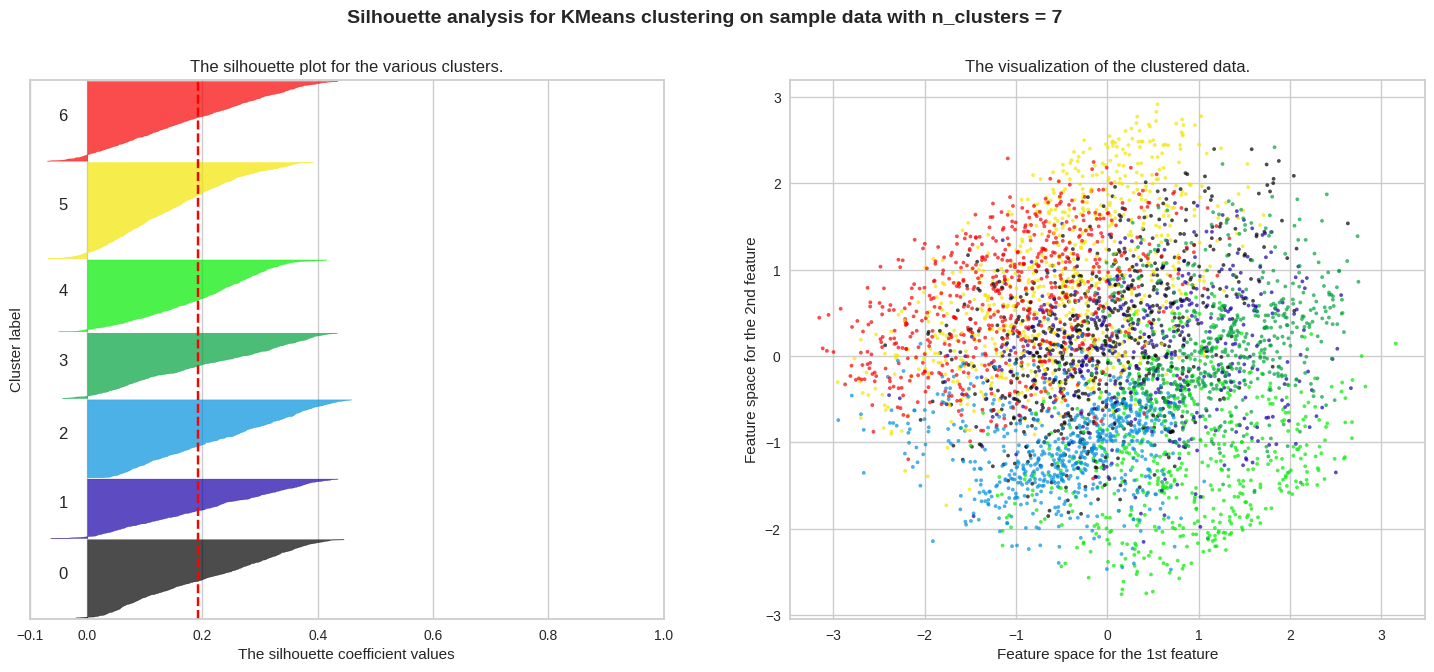

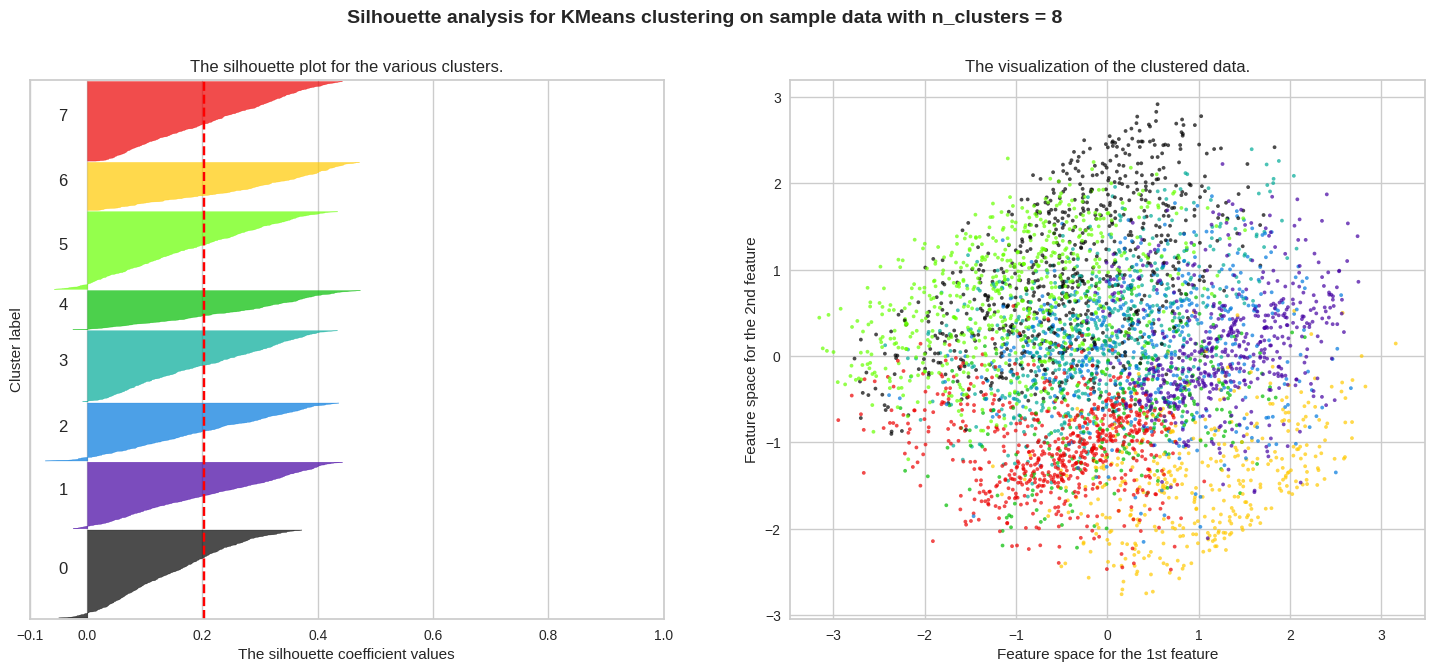

In [54]:
k_values = [2, 3, 4, 5, 6, 7, 8]
plot_silhouette(KMeans, k_values, X_tr, "KMeans")

plt.show()

Berdasarkan hasil pencarian jumlah cluster yang optimal dengan menggunakan teknik elbow method dan silhouette di atas, saya mengambil jumlah cluster 3 sebagai jumlah cluster terbaik. Hal ini karena pada elbow method terdapat pada cluster ke-5, sedangkan di silhouette model cluster 5 masih sulit untuk dibedakan tiap masing-masing clusternya. Sehingga yang cukup mudah untuk dibedakan tiap clusternya adalah cluster ke-3.

# Clustering

In [55]:
#melakukan clustering berdasarkan jumlah cluster yang optimal
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
y_pred = km.fit_predict(X_tr)
y_pred

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

In [56]:
#melihat shape data
X_tr.shape

(4316, 7)

In [57]:
#membuat dataframe dari X_tr dan memberi nama kolom
df_tr1 = pd.DataFrame(X_tr).rename(columns={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4",
                                            4: "PC5", 5: "PC6", 6: "PC7"})

In [58]:
#panjang list hasil clustering
len(list(y_pred))

4316

In [59]:
#menambahkan list hasil clustering sebagai isi dari kolom cluster pada df_xpro
df_tr1['cluster'] = list(y_pred)

In [60]:
df_tr1

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.369989 -0.046116  1.827360 -1.764291 -0.356686 -0.045369  0.564623   
1    -0.699332 -0.492446  1.762669 -1.245257 -0.493686  0.702445  0.602378   
2    -0.434264  0.091420  2.008993 -1.081521 -0.558044  0.900930  0.555406   
3    -0.165835  0.081344  2.308562 -1.192235 -0.932551  0.623577 -0.015134   
4    -1.124064  0.845971  0.527112 -0.586007  0.015220  0.518027  3.275499   
...        ...       ...       ...       ...       ...       ...       ...   
4311 -0.813293 -1.823884  0.032865  1.485100 -0.003779 -0.804672 -0.468385   
4312  0.887936 -0.983710  0.070127  2.385059 -0.001909 -0.217911  0.132959   
4313 -1.360198  1.143006 -0.719297  1.491037  0.630281 -0.009854 -0.261293   
4314 -1.720888  0.700312  0.450409  1.665091  0.679859  0.091042 -0.371738   
4315 -0.820479  0.786936 -2.016324  1.572432  0.350935 -0.815180 -0.787376   

      cluster  
0           2  
1           2  
2           2  
3           2  
4           2  
...       ...  
4311        2  
4312        2  
4313        1  
4314        2  
4315        1  

[4316 rows x 8 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

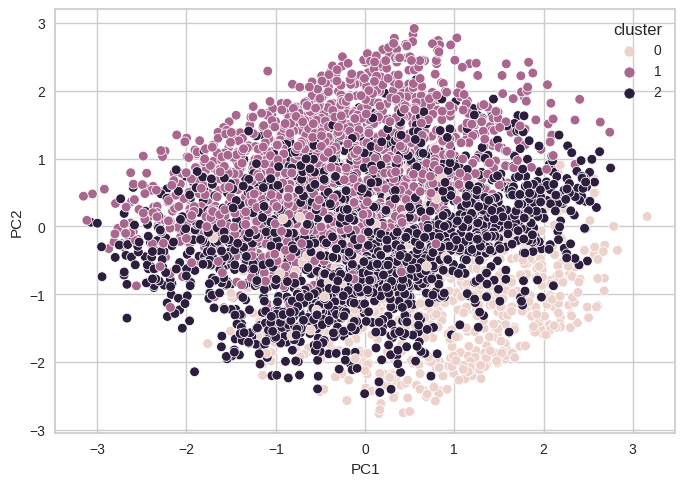

In [61]:
#melakukan plot hasil dari PCA dan clustering
sns.scatterplot(data=df_tr1, x='PC1', y='PC2', hue='cluster')

# EDA Cluster

In [62]:
df_train['cluster'] = list(y_pred)

In [63]:
df_train

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.549399  0.287716          -0.028482  -0.100677          0.440087   
1     0.040858 -0.139400           0.485810   0.491734          0.970530   
2     0.190207  0.353601           0.485810   0.802407          1.248706   
3     0.260830  0.803646           0.485810  -0.048801          0.486537   
4     0.353746 -0.188514          -2.500035   0.737613          1.190689   
...        ...       ...                ...        ...               ...   
4311  0.342970  0.367841           0.485810  -1.692061         -0.984831   
4312  0.965816  0.196222           0.115103  -1.692061         -0.984831   
4313  0.267860  1.051474           0.485810   0.477393          0.874291   
4314  0.309036  1.265061           0.485810   0.835243          1.278107   
4315  0.080471  0.729729           0.485810   0.685994          0.680780   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -1.100724     -0.931192            -0.896683   
1                  -1.100724     -0.931192            -0.896683   
2                  -1.100724     -0.931192            -0.896683   
3                  -1.100724     -0.931192            -0.896683   
4                  -1.100724     -0.931192            -0.896683   
...                      ...           ...                  ...   
4311               -1.100724      1.075711            -1.323417   
4312               -1.100724      1.387418            -1.323417   
4313                0.485589      1.206748             1.187893   
4314               -1.100724      1.424558             0.034117   
4315                1.064265      1.423045             1.019349   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.198616                         -0.970922   
1                      -0.198616                         -0.970922   
2                      -0.198616                         -0.970922   
3                      -0.198616                         -0.970922   
4                      -0.198616                         -0.970922   
...                          ...                               ...   
4311                   -0.739740                         -0.970922   
4312                   -0.739740                         -0.970922   
4313                    1.771217                          0.128167   
4314                    0.981692                         -0.970922   
4315                   -0.339989                          1.147621   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.728019         -0.853380      -0.890790     -1.546689   
1                  -0.728019         -0.853380      -0.890790     -1.546689   
2                  -0.728019         -0.853380      -0.890790     -1.020286   
3                  -0.728019         -0.853380      -0.890790     -0.356898   
4                  -0.728019         -0.853380      -0.890790     -1.310008   
...                      ...               ...            ...           ...   
4311                2.041957          1.699880      -1.396450     -1.310008   
4312                2.041957          1.452444      -1.396450      0.301421   
4313                2.041957          1.699880       0.824571      1.456902   
4314                2.041957          1.740707       0.980376      0.780327   
4315                2.041957          1.740707       0.712116      0.253599   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0    -1.438408          0.115075         -0.576311 -2.509449        2  
1    -1.258041         -0.870969         -0.576311 -2.509449        2  
2    -0.827851         -0.471585         -0.576311 -2.509449        2  
3    -0.973747          0.663233         -0.576311 -2.509449        2  
4    -1.713227         -1.732289         -0.576311 -2.509449        2  
...        ...               ...               ...       ...      .

In [64]:
df_train.cluster.value_counts()

2    1931
1    1606
0     779
Name: cluster, dtype: int64

In [65]:
#melihat jumlah rata-rata setiap kolom pada setiap cluster
df_train.groupby('cluster').mean()

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                       
0        0.040803 -1.072882          -0.202124   0.593687          0.069179   
1       -0.013299  0.192712           0.145439   0.599573          0.196856   
2       -0.005400  0.272542          -0.039421  -0.738165         -0.191632   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                      0.657713     -0.813770             0.725718   
1                      0.858545     -0.137762             0.733189   
2                     -0.979379      0.442865            -0.902556   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.284377                          0.624023   
1                          0.169035                          0.814841   
2                         -0.255308                         -0.929440   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                     -0.654555         -0.764872       0.617386   
1                     -0.106082         -0.114455       0.713775   
2                      0.352287          0.403754      -0.842707   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
cluster                                                                        
0            0.105846  0.102489         -0.839294          1.898812 -0.013877  
1            0.051545  0.115566          0.223048         -0.406474  0.113352  
2           -0.085570 -0.137461          0.153079         -0.427954 -0.088676

- User pada golongan cluster ke-1 memiliki rata-rata balance sebesar -1.07 yang artinya saldo pada limit user mencapai - dan user cluster ini jarang melakukan transaksi pada bank tersebut. Akan tetapi pada cluster ini user sering melakukan transaksi pembelian hingga mencapai rata-rata 0.593
- User pada golongan cluster ke-2 memiliki rata-rata balance sebesar 0.192 yang artinya relatif sering mengupdate saldo balance, dan user sering melakukan topup saldo hingga mencapai rata-rata 0.145 dengan rata-rata pembelian yang di lakukan oleh user sebanyak 0.599
- User pada golongan cluster ke-3 memiliki rata-rata balance atau saldo paling besar yaitu 0.272. Akan tetapi user jarang melakukan top up saldo hingga mencapai rata-rata -0.039 dengan rata-rata pembelian -0.738 yang artinya pada cluster ini sangat jarang melakukan transaksi belanja.

# Model Saving

In [66]:
# membuat pipeline data preprocessing
pipe1 = Pipeline(
    steps=[
        ("preprocessor",pipe),
        ("pca",PCA(n_components=.8)),
        ("estimator",KMeans(n_clusters=3, random_state=42))
    ]
)
pipe1.fit(df_train)

# save tuned-model random forest
with open('kmeans_3.pkl','wb') as file_1:
    joblib.dump(pipe1,file_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
> Dalam konteks algoritma K-Means, "inertia" mengacu pada ukuran kualitas clustering yang dihasilkan oleh algoritma tersebut. Inertia dihitung sebagai jumlah jarak kuadrat antara setiap titik data dalam cluster dengan pusat cluster yang terdekat. Tujuan utama dari K-Means adalah meminimalkan inertia agar pusat cluster yang dipilih dapat mewakili titik-titik data yang ada di dalamnya dengan sebaik mungkin. Semakin rendah nilai inertia, semakin baik kualitas clustering yang dihasilkan. Jadi, dalam konteks algoritma K-Means, inertia digunakan sebagai ukuran evaluasi untuk mengevaluasi kualitas clustering yang dihasilkan.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
> - Metode Elbow (Elbow Method) adalah sebuah metode yang digunakan dalam analisis clustering untuk memilih jumlah optimal dari cluster dalam algoritma K-Means. Metode ini dinamakan "elbow" karena pada plot nilai inertia terhadap jumlah cluster, sering terbentuk suatu lengkungan seperti siku yang menyerupai siku tangan manusia.
> - Alasan penggunaan Metode Elbow adalah untuk membantu menentukan jumlah cluster yang paling sesuai atau optimal dalam dataset tertentu. Dalam K-Means, kita harus secara manual menentukan jumlah cluster yang akan digunakan. Metode Elbow membantu mengatasi kebingungan dalam memilih jumlah cluster yang tepat dengan memberikan indikasi visual melalui kurva elbow pada grafik.
> - Langkah-langkah untuk menggunakan elbow method : (1) menjalankan K-Means dengan berbagai jumlah cluster, mulai dari 1 hingga k, dimana k adalah jumlah cluster maksimal yang diinginkan, (2) hitunf nilai inertia (jumlah jarak kuadrat) untuk setiap jumlah cluster, (3) plot nilai inertia terhadap jumlah cluster pada grafik, (4) Perhatikan bentuk grafik dan cari "elbow" atau siku pada grafik. Elbow adalah titik di mana penurunan nilai inertia mulai melambat secara signifikan, (5) Pilih jumlah cluster yang terletak di sekitar elbow sebagai jumlah cluster yang optimal.
> - Kelebihan dan kekurangan elbow method : Memberikan indikasi visual yang berguna untuk menentukan jumlah cluster yang optimal, namun kadang-kadang tidak selalu jelas atau tidak ada elbow yang terlihat pada grafik inertia, sehingga sulit untuk memilih jumlah cluster yang optimal dengan jelas.

# Conclusion

- K-means adalah teknik unsupervised learning untuk mengelompokkan data menjadi beberapa cluster
- K-means dilakukan dengan menggunakan elbow method dan silhouettte method
- Terdapat 3 cluster pada customer segmentation penggunaan kartu kredit selama 6 bulan terakhir
- Customer cluster ke-1 memiliki kecenderungan untuk melakukan transaksi pembelian meskipun limit balance yang dimiliki negatif
- Customer cluster ke-2 relatif seimbang antara limit balance dan transaksi pembelian
- Customer cluster ke-3 memiliki kecenderungan untuk berhemat meskipun balance yang dimiliki relatif lebih besar dari cluster yang lain, akan tetapi cluster ini jarang melakukan transaksi pembelian.